# Repaying the Credit

* Gold Atlantis, a credit-providing firm, observed a rise in the number of defaulters.Now, the firm is only interested in those consumers who have a lower probability of becoming a defaulter.
* When Gold Atlantis receives a credit application, it approves or disapproves the application based on the applicant's profile.
* However, there are two types of risks that are associated with the firm's decisions:
If the applicant is likely to repay the loan, then disapproving the loan may result in a loss of business to the firm.
If the applicant is not likely to repay the loan, that is if the applicant is a defaulter, then approving the loan may lead to a financial loss to the firm.
* As an analyst, you need to analyze the credit data of Gold Atlantis, figure out various patterns in the data, and make interpretations. The aim of this analysis is to help the firm identify those customers who have a lower probability of becoming a defaulter.

# Import Librarys 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Read The Files Using Input Function

In [2]:
bank=pd.read_csv(r"C:\Users\pandi\Downloads\DS1_C5_S4_Credit_Data_Hackathon.csv")
bank

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


# Analysis About The File
    * File Shape(Rows And Columns)
    * Details About File
    * Find Missing Values And Fix 
    * Seprate The Cetegorical And Numerical

In [3]:
bank.shape
# File Have 100000 Rows & 24 Columns

(100000, 24)

In [4]:
bank.info()
# Detail about All Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [5]:
bank.isnull().sum()
# Find The Missing Values

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

# Fix The Missing Values

In [6]:
missing_values=['AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_TYPE_SUITE','OCCUPATION_TYPE','CNT_FAM_MEMBERS']
for i in missing_values:
    if bank[i].dtype=='object':
        bank[i].fillna(bank[i].mode()[0],inplace=True)
    else:
        bank[i].fillna(round(bank[i].mean()),inplace=True)

In [7]:
bank.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
GENDER                 0
Car                    0
House                  0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
DAYS_EMPLOYED          0
MOBILE                 0
WORK_PHONE             0
HOME_PHONE             0
MOBILE_REACHABLE       0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
APPLICATION_DAY        0
TOTAL_DOC_SUBMITTED    0
dtype: int64

In [8]:
ca=[]
nu=[]
for i in bank.columns:
    if bank[i].nunique()<20:
        ca.append(i)
    else:
        nu.append(i)
cat=bank.loc[:,ca]
num=bank.drop(ca,axis=1)



# Level 1 Analysis  - UniVariate Analysis  For Categorical Columns

#    CATEGORICAL COLUMNS

In [9]:
for i in cat.columns:
    if bank[i].isnull().sum()==0:
        print(f'{i}')
        print(f"Missing Values :{bank[i].isnull().sum()}")
        print(f"Mode value :{bank[i].mode()}")
        print(f"Unique value :{bank[i].unique()}")        
        print(f"No of Unique value :{bank[i].nunique()}")
        print('\n')


TARGET
Missing Values :0
Mode value :0    0
Name: TARGET, dtype: int64
Unique value :[1 0]
No of Unique value :2


NAME_CONTRACT_TYPE
Missing Values :0
Mode value :0    Cash loans
Name: NAME_CONTRACT_TYPE, dtype: object
Unique value :['Cash loans' 'Revolving loans']
No of Unique value :2


GENDER
Missing Values :0
Mode value :0    F
Name: GENDER, dtype: object
Unique value :['M' 'F' 'XNA']
No of Unique value :3


Car
Missing Values :0
Mode value :0    N
Name: Car, dtype: object
Unique value :['N' 'Y']
No of Unique value :2


House
Missing Values :0
Mode value :0    Y
Name: House, dtype: object
Unique value :['Y' 'N']
No of Unique value :2


CNT_CHILDREN
Missing Values :0
Mode value :0    0
Name: CNT_CHILDREN, dtype: int64
Unique value :[ 0  1  2  3  4  7  5  6  8  9 11 12]
No of Unique value :12


NAME_TYPE_SUITE
Missing Values :0
Mode value :0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object
Unique value :['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'


# Data Cleaning Process

In [10]:
# Gender 
cat[cat['GENDER']=='XNA']=cat[cat['GENDER']=='XNA'].replace('XNA',cat['GENDER'].mode()[0])
bank[bank['GENDER']=='XNA']=bank[bank['GENDER']=='XNA'].replace('XNA',bank['GENDER'].mode()[0])

# Family Status
bank['NAME_FAMILY_STATUS']=bank['NAME_FAMILY_STATUS'].str.replace('Unknown',bank['NAME_FAMILY_STATUS'].mode()[0])

# Income Type
m1={'Working':'Working','Commercial associate':'Commercial associate','Pensioner':'Pensioner','State servant':'State servant','Unemployed':'Others', 'Student':'Others', 'Businessman':'Others', 'Maternity leave':'Others'}
bank['NAME_INCOME_TYPE']=bank['NAME_INCOME_TYPE'].map(m1)

# Name Type Suite
m2={'Unaccompanied':'Unaccompanied', 'Family':'Family', 'Spouse, partner':'Spouse, partner', 'Children':'Others',
       'Other_A':'Others', 'Other_B':'Others', 'Group of people':'Others'}
bank['NAME_TYPE_SUITE']=bank['NAME_TYPE_SUITE'].map(m2)

# Children Count
m3={ 0:0,  1:1,  2:2,  3:'3+',  4:'3+',  7:'3+',  5:'3+',  6:'3+',  8:'3+',  9:'3+', 11:'3+', 12:'3+'}
bank['CNT_CHILDREN']=bank['CNT_CHILDREN'].map(m3)

# Total Document Submit
m4={1:1, 0:0, 2:2, 3:'2+', 4:'2+'}
bank['TOTAL_DOC_SUBMITTED']=bank['TOTAL_DOC_SUBMITTED'].map(m4)

# Familt Members Count
m5={ 1.:1,  2.:2,  3.:3,  4.:'4+',  5.:'4+',  6.:'4+',  9.:'4+',  7.:'4+',  8.:'4+', 10.:'4+', 13.:'4+', 14.:'4+'}
bank['CNT_FAM_MEMBERS']=bank['CNT_FAM_MEMBERS'].map(m5)


In [11]:
# After Cleaning The Data .
for i in cat.columns:
    if bank[i].isnull().sum()==0:
        print(f'{i}')
        print(f"Missing Values :{bank[i].isnull().sum()}")
        print(f"Mode value :{bank[i].mode()}")
        print(f"Unique value :{bank[i].unique()}")        
        print(f"No of Unique value :{bank[i].nunique()}")
        print('\n')


TARGET
Missing Values :0
Mode value :0    0
Name: TARGET, dtype: int64
Unique value :[1 0]
No of Unique value :2


NAME_CONTRACT_TYPE
Missing Values :0
Mode value :0    Cash loans
Name: NAME_CONTRACT_TYPE, dtype: object
Unique value :['Cash loans' 'Revolving loans']
No of Unique value :2


GENDER
Missing Values :0
Mode value :0    F
Name: GENDER, dtype: object
Unique value :['M' 'F']
No of Unique value :2


Car
Missing Values :0
Mode value :0    N
Name: Car, dtype: object
Unique value :['N' 'Y']
No of Unique value :2


House
Missing Values :0
Mode value :0    Y
Name: House, dtype: object
Unique value :['Y' 'N']
No of Unique value :2


CNT_CHILDREN
Missing Values :0
Mode value :0    0
Name: CNT_CHILDREN, dtype: object
Unique value :[0 1 2 '3+']
No of Unique value :4


NAME_TYPE_SUITE
Missing Values :0
Mode value :0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object
Unique value :['Unaccompanied' 'Family' 'Spouse, partner' 'Others']
No of Unique value :4


NAME_INCOME_TYPE
Missing Val

In [12]:
# Define The Function For Print The Count Of Values On Graph.
def cb(ax,count='number of rows'):
    for bar in ax.patches:
        count=f"{round(bar.get_height())}"
        x=bar.get_x()+bar.get_width()/2
        y=bar.get_height()
        ax.annotate(count,(x,y),va='bottom',ha='center')

In [13]:
# Define The Function For Print The Percentage  Of Values On Graph.
def cp(ax,count='number of rows'):
    for bar in ax.patches:
        count=f"{round(bar.get_height()/bank.shape[0]*100,2)}"
        x=bar.get_x()+bar.get_width()/2
        y=bar.get_height()
        ax.annotate(count,(x,y),va='bottom',ha='center')

# 1. APPLICATION_DAY

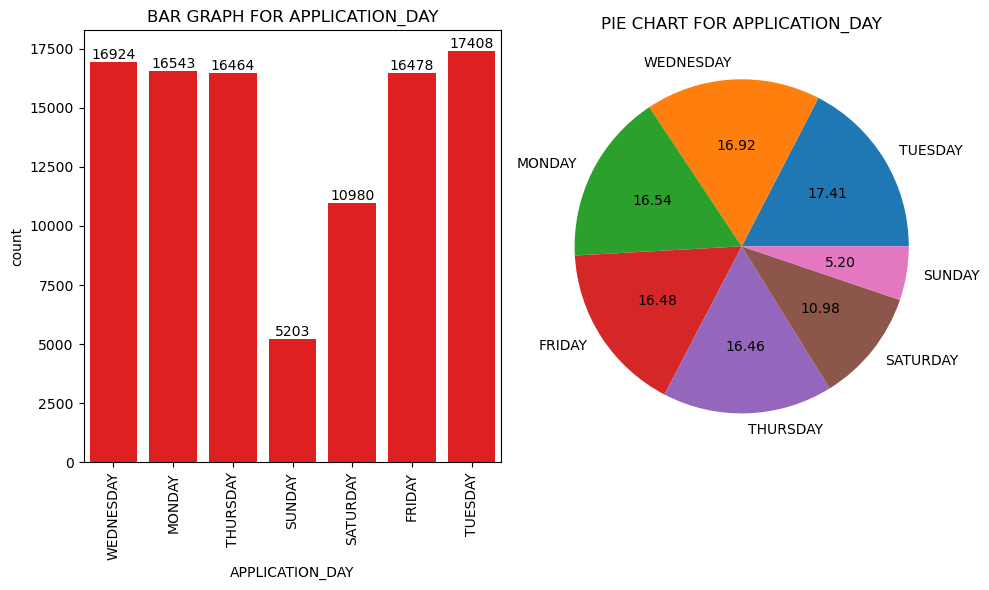

In [14]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
q=cat['APPLICATION_DAY'].value_counts().index
w=cat['APPLICATION_DAY'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['APPLICATION_DAY'],ax=ax[0],color='red')
for bar in ax[0].patches:
    count=f"{round(bar.get_height())}"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax[0].annotate(count,(x,y),va='bottom',ha='center')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.tight_layout() 
ax[0].set_title('BAR GRAPH FOR APPLICATION_DAY')
ax[1].set_title('PIE CHART FOR APPLICATION_DAY')
plt.tight_layout()
plt.show()

# Lot Of Application Submitted In Tuesday

# 2. CAR

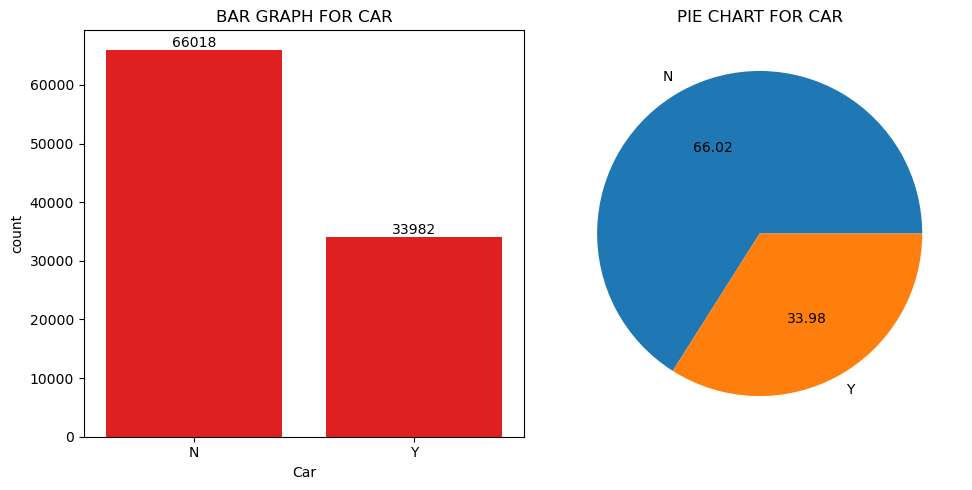

In [15]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=cat['Car'].value_counts().index
w=cat['Car'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['Car'],ax=ax[0],color='red')
cb(ax[0],bank)
ax[0].set_title('BAR GRAPH FOR CAR')
ax[1].set_title('PIE CHART FOR CAR')
plt.tight_layout()
plt.show()

#  Near By 34 % People Only Have Car

# 3. GENDER

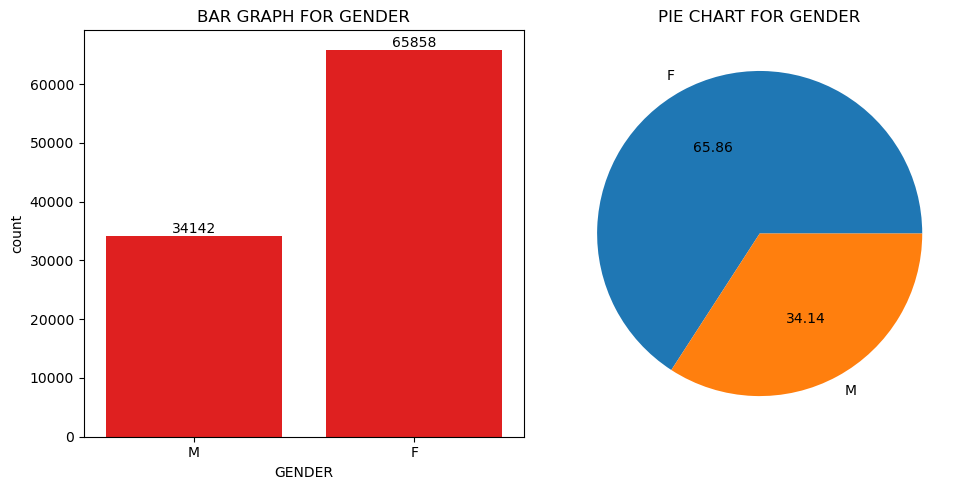

In [16]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=cat['GENDER'].value_counts().index
w=cat['GENDER'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['GENDER'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR GENDER')
ax[1].set_title('PIE CHART FOR GENDER')
plt.tight_layout()
plt.show()

# 66% customers are Female

# 4.HOUSE

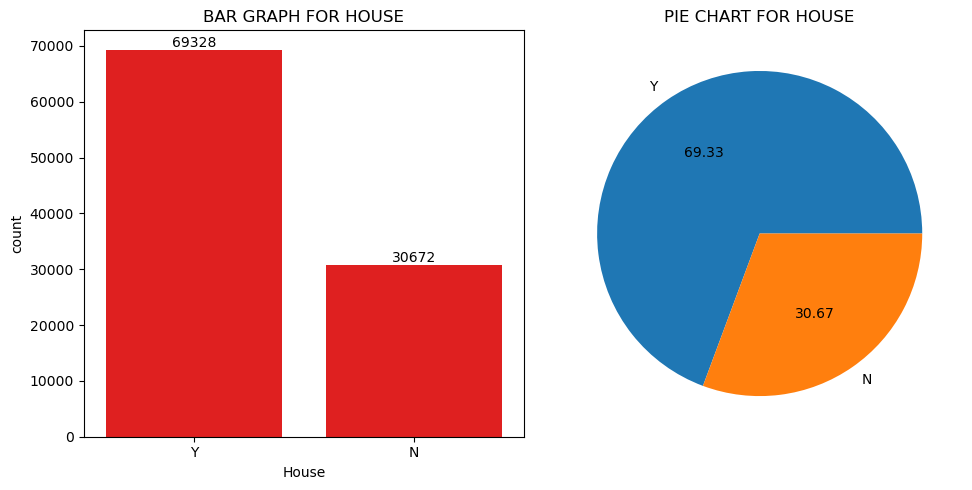

In [17]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=cat['House'].value_counts().index
w=cat['House'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['House'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR HOUSE')
ax[1].set_title('PIE CHART FOR HOUSE')
plt.tight_layout()
plt.show()


# Near by 70% people have own house.

# 5. NAME CONTRACT TYPE

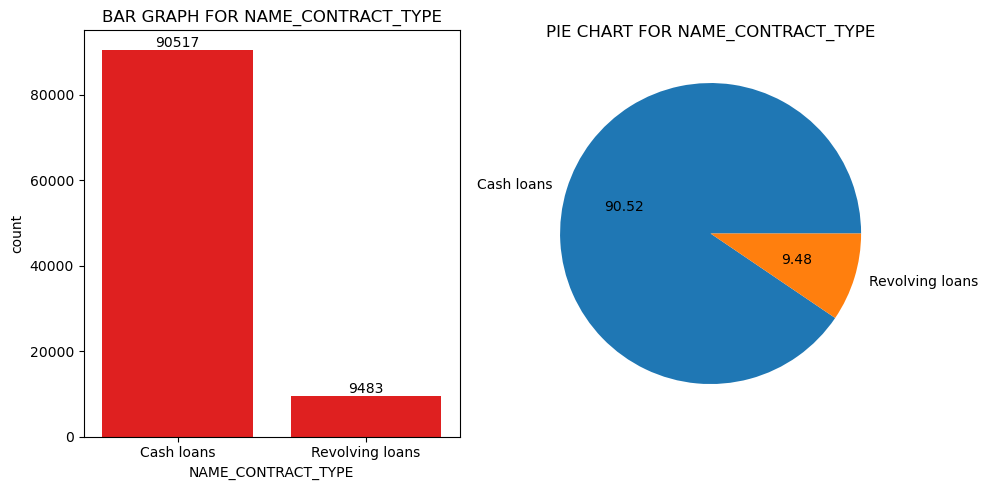

In [18]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=cat['NAME_CONTRACT_TYPE'].value_counts().index
w=cat['NAME_CONTRACT_TYPE'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['NAME_CONTRACT_TYPE'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR NAME_CONTRACT_TYPE')
ax[1].set_title('PIE CHART FOR NAME_CONTRACT_TYPE')
plt.tight_layout()
plt.show()

# Near by 91% peoples gets cash loans.

# 6. NAME EDUCATION TYPE

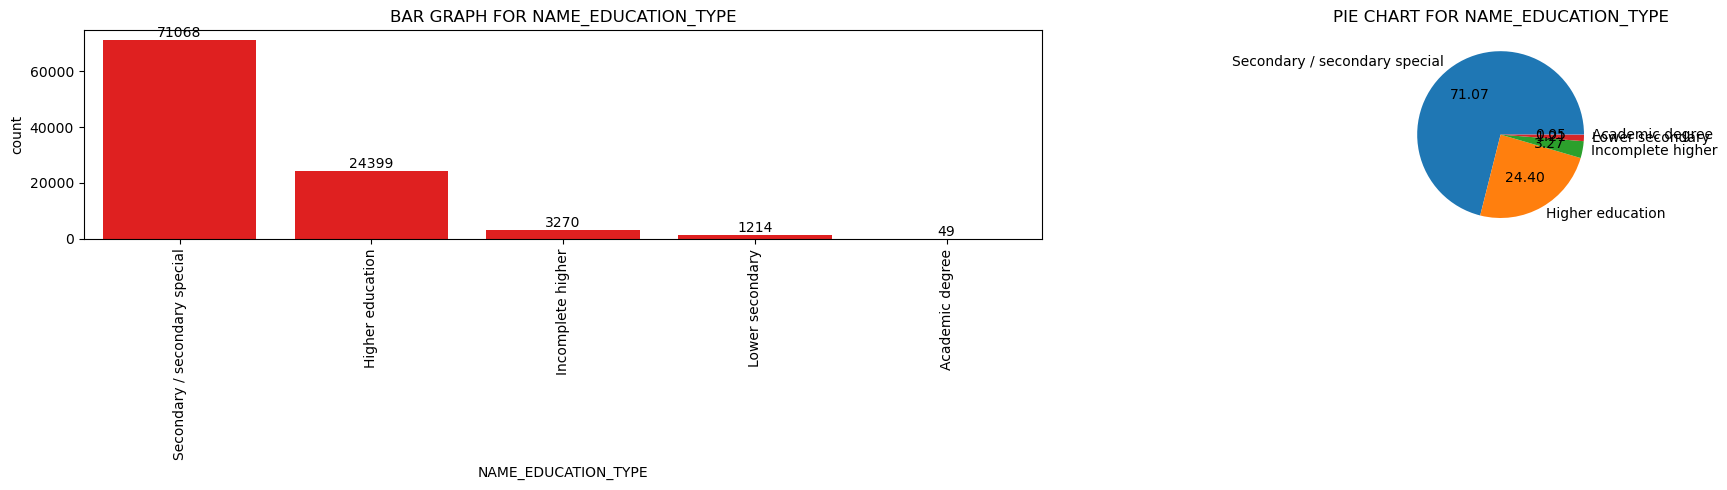

In [19]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
q=cat['NAME_EDUCATION_TYPE'].value_counts().index
w=cat['NAME_EDUCATION_TYPE'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['NAME_EDUCATION_TYPE'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR NAME_EDUCATION_TYPE')
ax[1].set_title('PIE CHART FOR NAME_EDUCATION_TYPE')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

# Maximum No of peoples study only  secondary or secondary special

# 7. NAME FAMILY TYPE

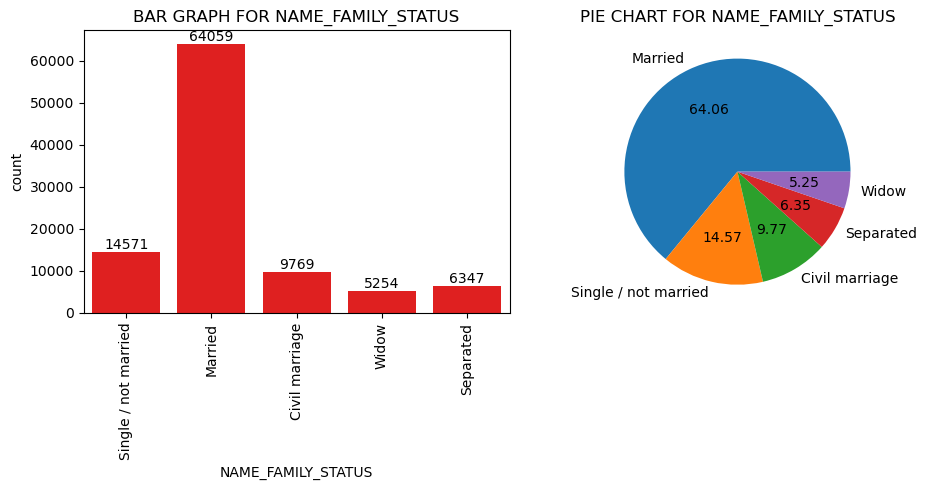

In [20]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=bank['NAME_FAMILY_STATUS'].value_counts().index
w=bank['NAME_FAMILY_STATUS'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=bank['NAME_FAMILY_STATUS'],ax=ax[0],color='red')
plt.xticks(rotation=90)
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR NAME_FAMILY_STATUS')
ax[1].set_title('PIE CHART FOR NAME_FAMILY_STATUS')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

# Lot of married persons apply for the loan

# 8. NAME INCOME TYPE

In [21]:
bank['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Others'], dtype=object)

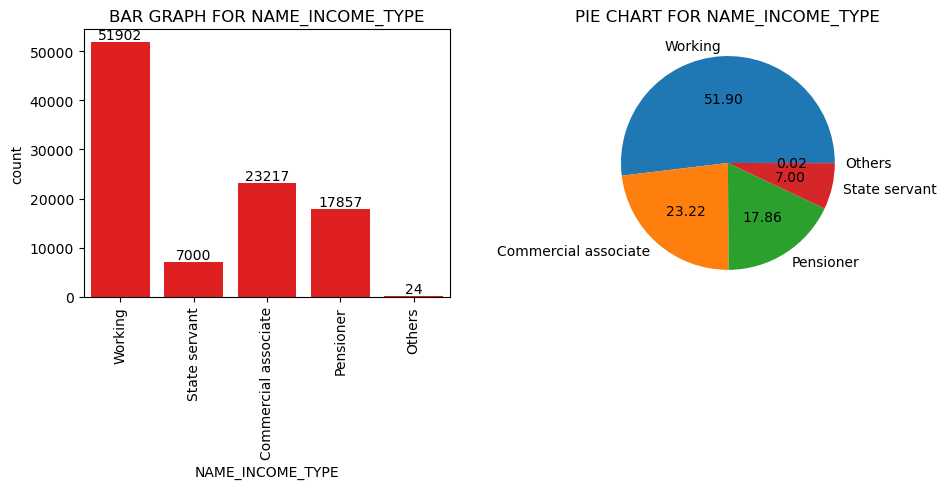

In [22]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=bank['NAME_INCOME_TYPE'].value_counts().index
w=bank['NAME_INCOME_TYPE'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=bank['NAME_INCOME_TYPE'],ax=ax[0],color='red')
plt.xticks(rotation=90)
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR NAME_INCOME_TYPE')
ax[1].set_title('PIE CHART FOR NAME_INCOME_TYPE')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

# Maximum peoples are working

# 9. NAME TYPE SUITE

In [23]:
bank['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Others'],
      dtype=object)

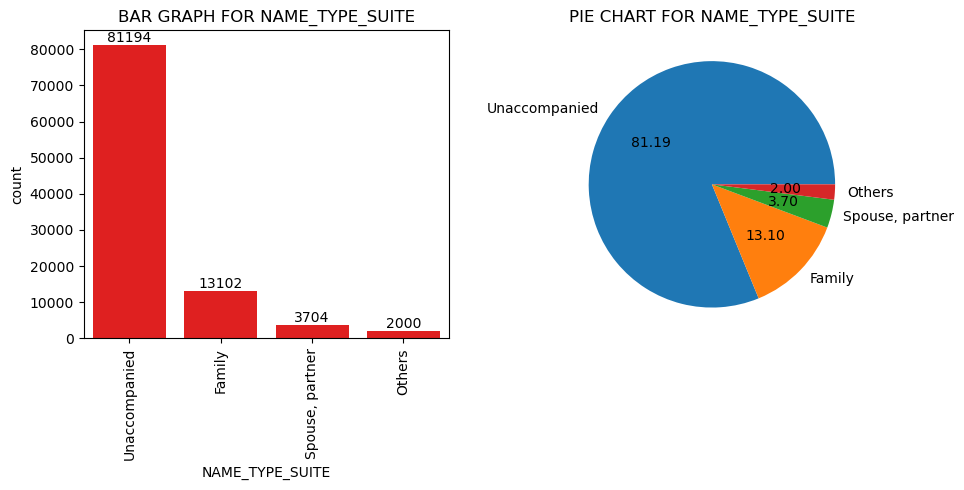

In [24]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=bank['NAME_TYPE_SUITE'].value_counts().index
w=bank['NAME_TYPE_SUITE'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=bank['NAME_TYPE_SUITE'],ax=ax[0],color='red')
plt.xticks(rotation=90)
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR NAME_TYPE_SUITE')
ax[1].set_title('PIE CHART FOR NAME_TYPE_SUITE')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

# Unaccompained peoples are apply the loan near by 82%

# 10.OCCUPATION TYPE

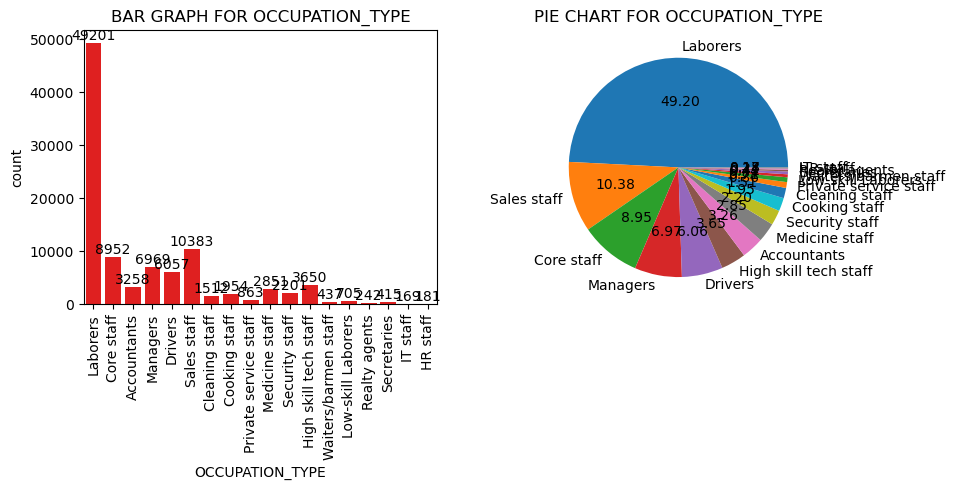

In [25]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=cat['OCCUPATION_TYPE'].value_counts().index
w=cat['OCCUPATION_TYPE'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['OCCUPATION_TYPE'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR OCCUPATION_TYPE')
ax[1].set_title('PIE CHART FOR OCCUPATION_TYPE')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

# 50% Laborers are apply the loan

# 11. TARGET

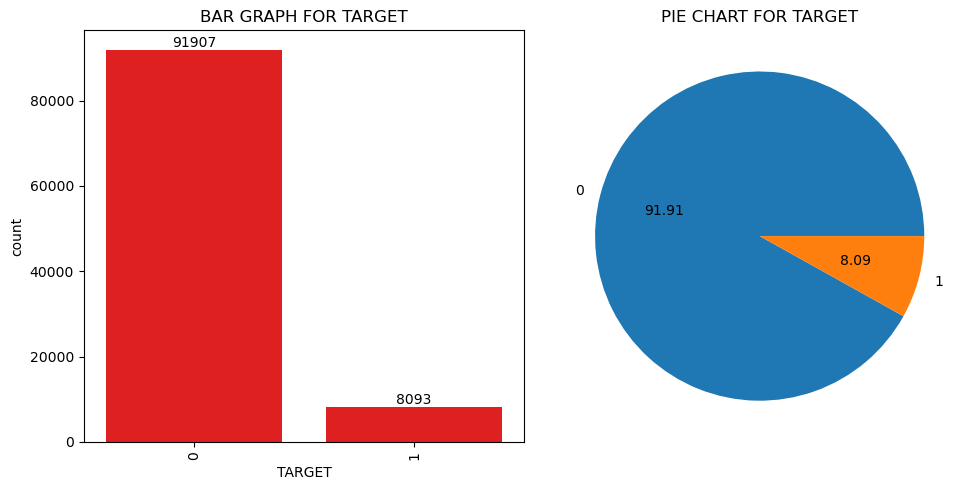

In [26]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=cat['TARGET'].value_counts().index
w=cat['TARGET'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['TARGET'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR TARGET')
ax[1].set_title('PIE CHART FOR TARGET')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

#  Almost 92% peoples paying good

# 12. CNT CHILDREN

In [27]:
bank['CNT_CHILDREN'].unique()

array([0, 1, 2, '3+'], dtype=object)

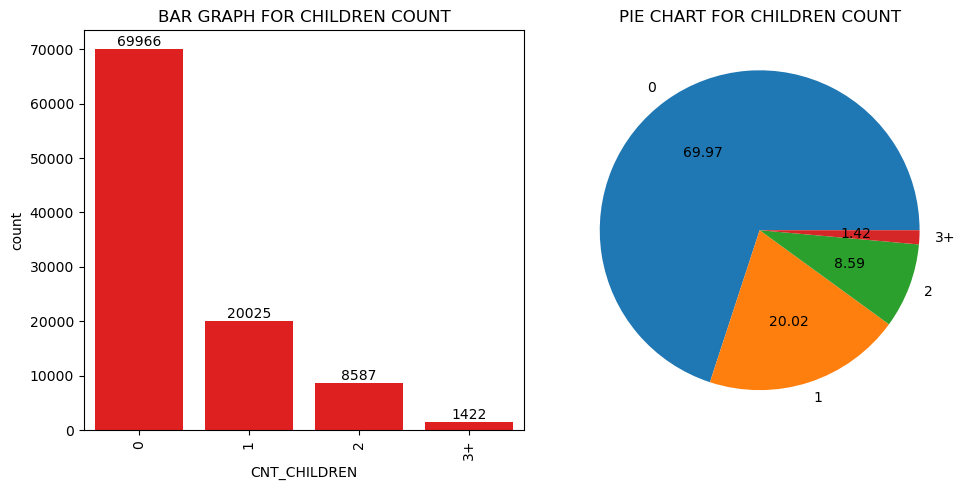

In [28]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=bank['CNT_CHILDREN'].value_counts().index
w=bank['CNT_CHILDREN'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=bank['CNT_CHILDREN'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR CHILDREN COUNT')
ax[1].set_title('PIE CHART FOR CHILDREN COUNT')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

# Near by 70 % peoples dont have a child.

# 12. MOBILE

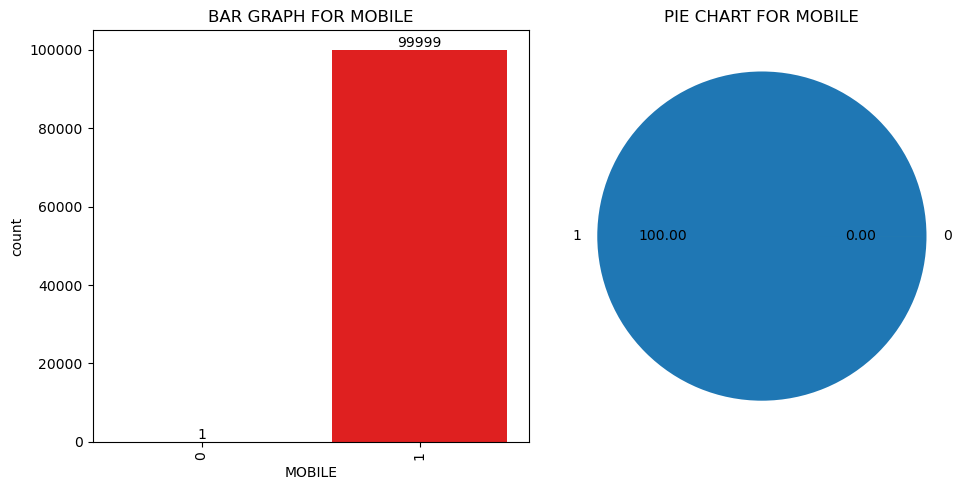

In [29]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=cat['MOBILE'].value_counts().index
w=cat['MOBILE'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['MOBILE'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR MOBILE')
ax[1].set_title('PIE CHART FOR MOBILE')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

# Almost all are have a mobile.

# 13. WORK PHONE

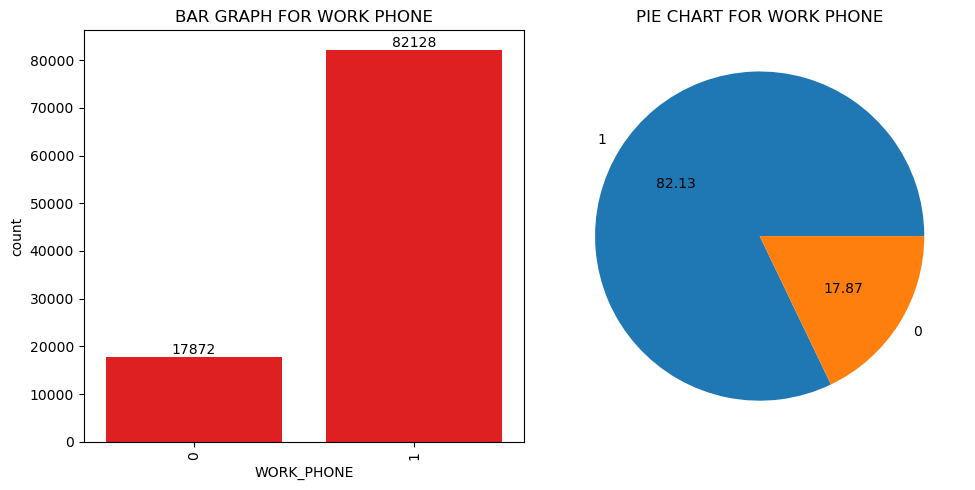

In [30]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=cat['WORK_PHONE'].value_counts().index
w=cat['WORK_PHONE'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['WORK_PHONE'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR WORK PHONE')
ax[1].set_title('PIE CHART FOR WORK PHONE')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

# Near by 82% people have work phone.

# 14. HOME PHONE

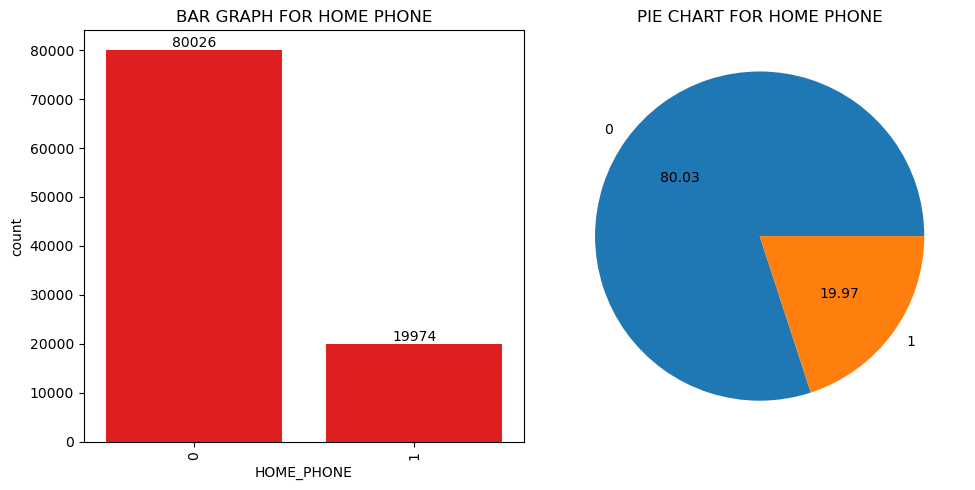

In [31]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=cat['HOME_PHONE'].value_counts().index
w=cat['HOME_PHONE'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['HOME_PHONE'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR HOME PHONE')
ax[1].set_title('PIE CHART FOR HOME PHONE')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

# Near by 80% people have home phone

# 15.MOBILE REACHABLE

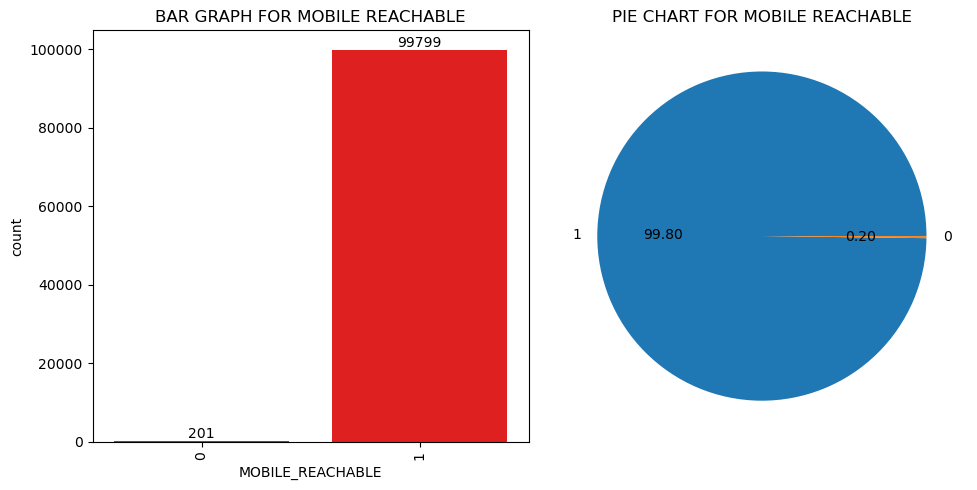

In [32]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=cat['MOBILE_REACHABLE'].value_counts().index
w=cat['MOBILE_REACHABLE'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['MOBILE_REACHABLE'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR MOBILE REACHABLE')
ax[1].set_title('PIE CHART FOR MOBILE REACHABLE')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

# Almost all are mobile reachable.

# 16.FLAG EMAIL

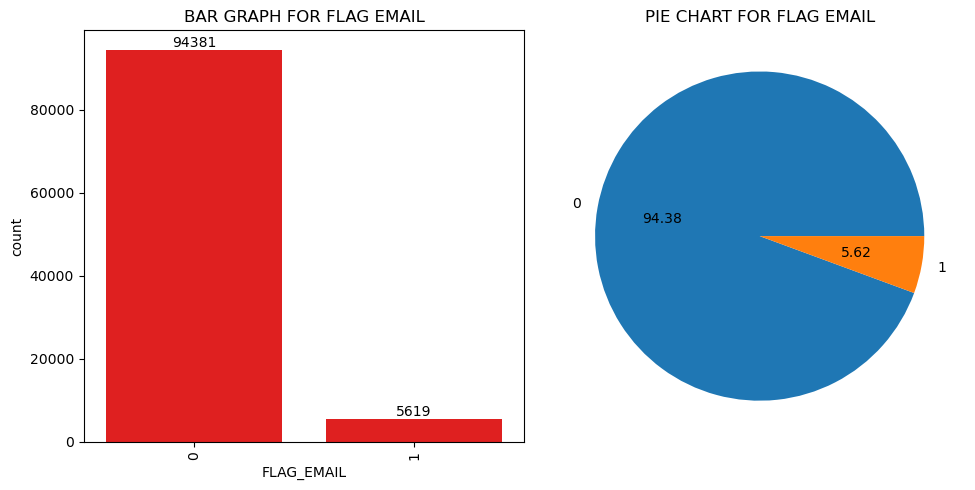

In [33]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=cat['FLAG_EMAIL'].value_counts().index
w=cat['FLAG_EMAIL'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['FLAG_EMAIL'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR FLAG EMAIL')
ax[1].set_title('PIE CHART FOR FLAG EMAIL')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

# 95% people share their email.

# 17. CNT FAM MEMBERS

In [34]:
bank['CNT_FAM_MEMBERS'].unique()

array([1, 2, 3, '4+'], dtype=object)

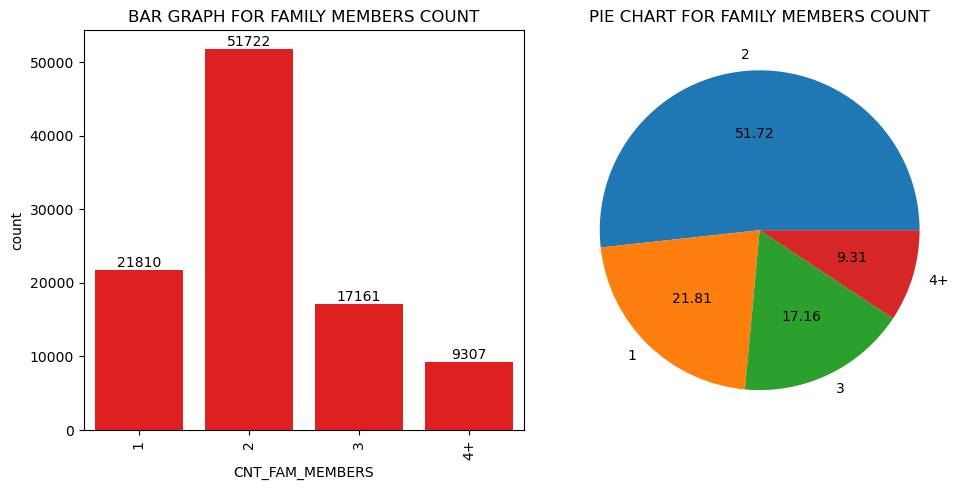

In [35]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=bank['CNT_FAM_MEMBERS'].value_counts().index
w=bank['CNT_FAM_MEMBERS'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=bank['CNT_FAM_MEMBERS'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR FAMILY MEMBERS COUNT')
ax[1].set_title('PIE CHART FOR FAMILY MEMBERS COUNT')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

# Near by 52% family have 2 family members.

# 18. TOTAL DOC SUBMITTED

In [36]:
bank['TOTAL_DOC_SUBMITTED'].unique()

array([1, 0, 2, '2+'], dtype=object)

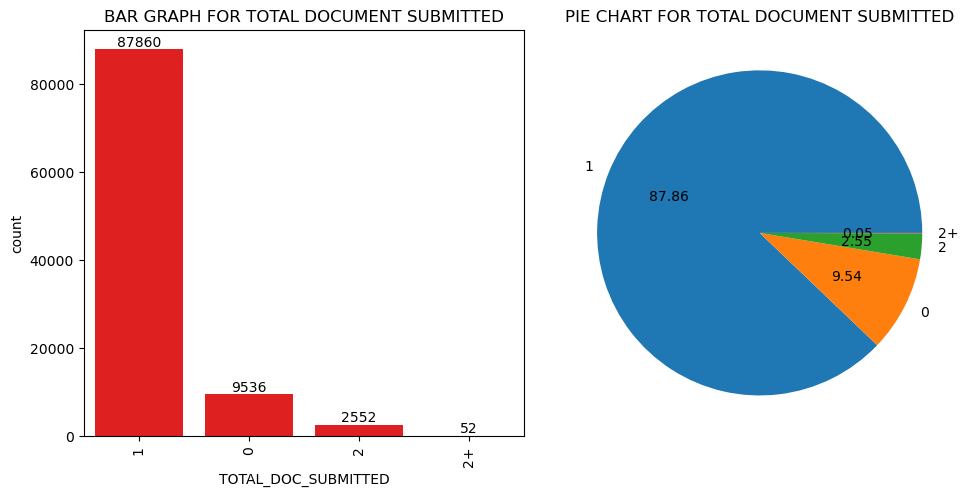

In [37]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=bank['TOTAL_DOC_SUBMITTED'].value_counts().index
w=bank['TOTAL_DOC_SUBMITTED'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=bank['TOTAL_DOC_SUBMITTED'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR TOTAL DOCUMENT SUBMITTED')
ax[1].set_title('PIE CHART FOR TOTAL DOCUMENT SUBMITTED')
plt.tight_layout()
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.show()

# 88% peoples submitted only one document.

# Level 1 Analysis  - UniVariate Analysis  For Numerical Columns

In [38]:
print(num.columns)

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'DAYS_EMPLOYED'],
      dtype='object')


# Checking Missing Values

In [39]:
for i in num.columns:
    if bank[i].isnull().sum()==0:
        print(i)
        print(f"Missing value : {bank[i].isnull().sum()}")    
        print(f"Mean value : {bank[i].mean()}")
        print(f"Median value : {bank[i].median()}")
        print(f"Nunique value : {bank[i].nunique()}")  
        print('\n')

SK_ID_CURR
Missing value : 0
Mean value : 158006.14086
Median value : 157877.0
Nunique value : 100000


AMT_INCOME_TOTAL
Missing value : 0
Mean value : 169426.07027325002
Median value : 144000.0
Nunique value : 1212


AMT_CREDIT
Missing value : 0
Mean value : 599003.4465
Median value : 513040.5
Nunique value : 4162


AMT_GOODS_PRICE
Missing value : 0
Mean value : 538345.14885
Median value : 450000.0
Nunique value : 624


DAYS_EMPLOYED
Missing value : 0
Mean value : 63292.22206
Median value : -1219.0
Nunique value : 9871




# 1.AMT CREDIT

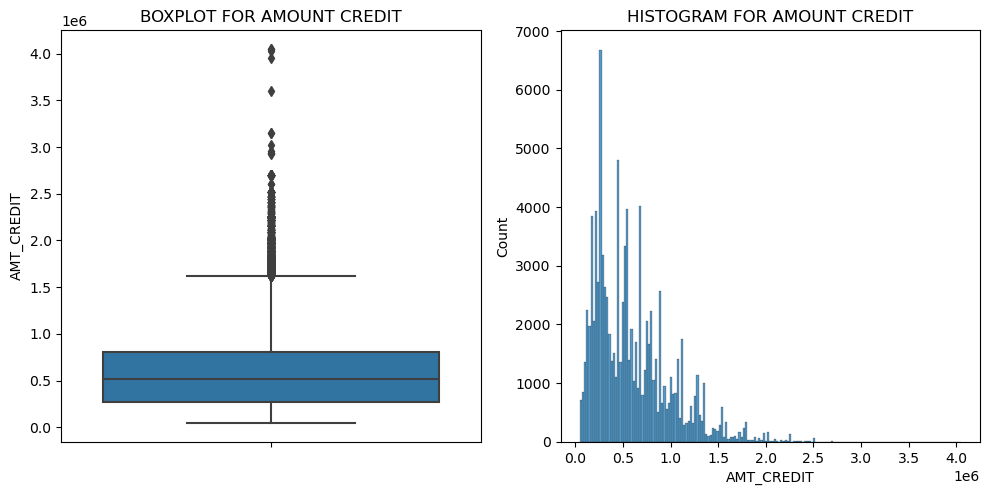

In [40]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.boxplot(y=num['AMT_CREDIT'],ax=ax[0])
sb.histplot(x=num['AMT_CREDIT'],ax=ax[1])
plt.tight_layout()
plt.tight_layout()
ax[0].set_title('BOXPLOT FOR AMOUNT CREDIT')
ax[1].set_title('HISTOGRAM FOR AMOUNT CREDIT')
plt.show()

# Almost lot of people wants their loan amount range between 45000 to 150000.
* Minimum value - 0.1
* maximum value - 1.7
* 50% values between  0.3 to 0.8
* Median - 0.5

# 2. AMT GOOD PRICE

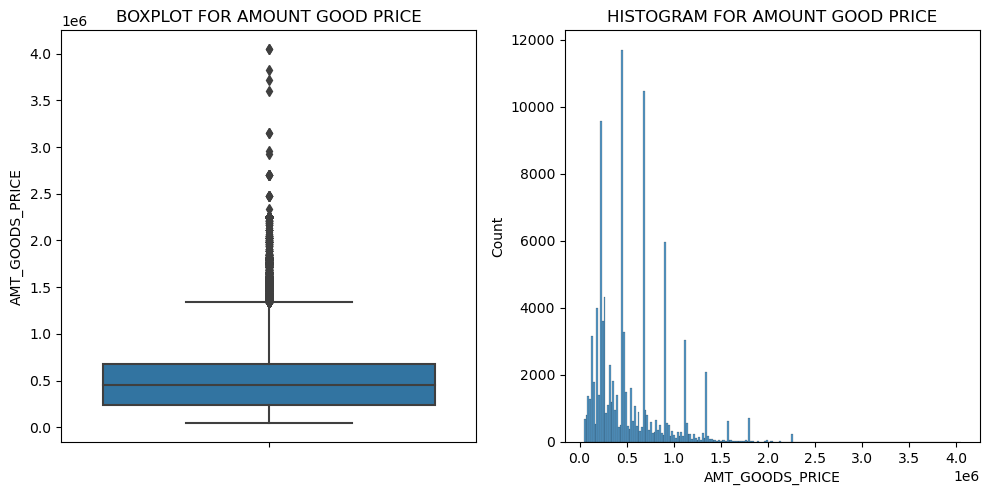

In [41]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.boxplot(y=num['AMT_GOODS_PRICE'],ax=ax[0])
sb.histplot(x=num['AMT_GOODS_PRICE'],ax=ax[1])
plt.tight_layout()
ax[0].set_title('BOXPLOT FOR AMOUNT GOOD PRICE')
ax[1].set_title('HISTOGRAM FOR AMOUNT GOOD PRICE')
plt.show()

# Customers Good price amount range between 10000 to 130000.
* Minimum value - 0.1
* maximum value - 1.4
* 50% values between  0.3 to 0.7
* Median - 0.4

# 3. SK ID CURR

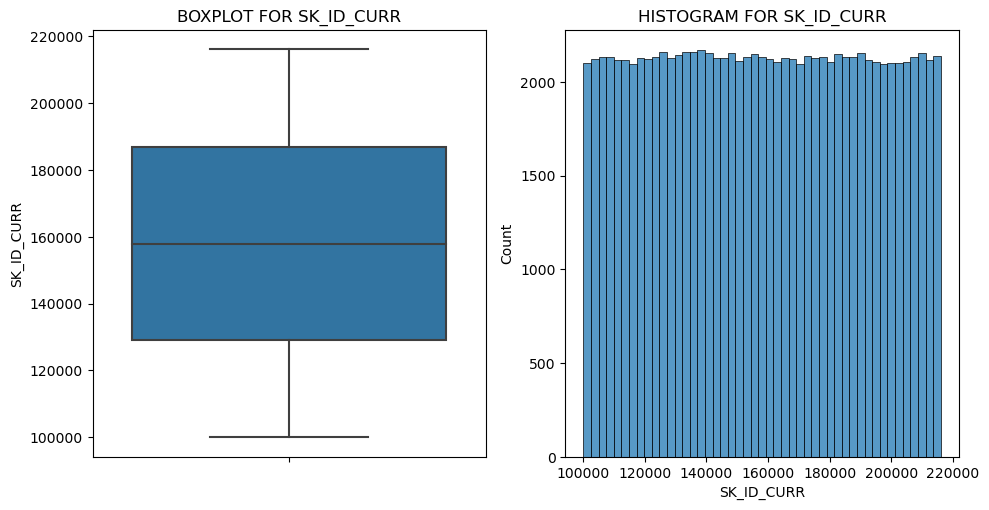

In [42]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.boxplot(y=num['SK_ID_CURR'],ax=ax[0])
sb.histplot(x=num['SK_ID_CURR'],ax=ax[1])
plt.tight_layout()
ax[0].set_title('BOXPLOT FOR SK_ID_CURR')
ax[1].set_title('HISTOGRAM FOR SK_ID_CURR')
plt.show()

# This is customer id

# OUTLIER TREATMENT

# 4. AMT INCOME TOTAL

In [43]:
num['AMT_INCOME_TOTAL'].mean()

169426.07027325002

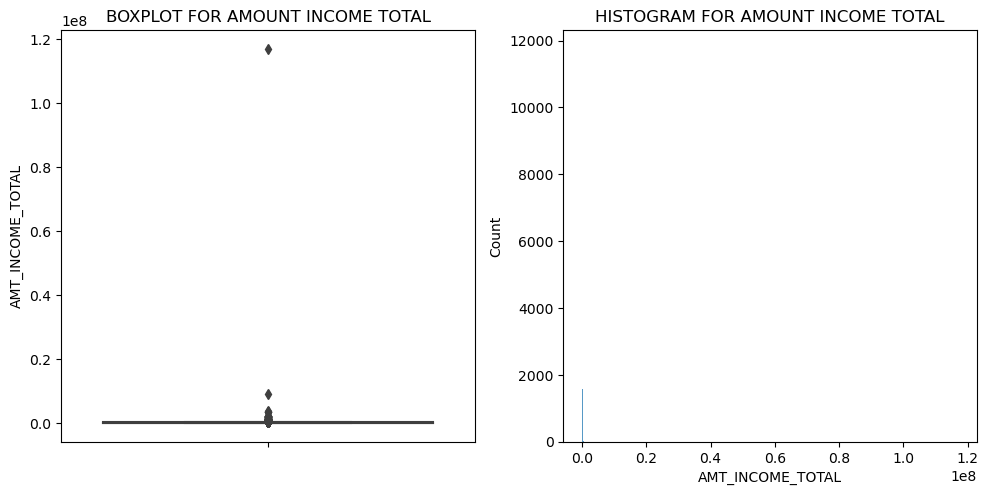

In [44]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.boxplot(y=num['AMT_INCOME_TOTAL'],ax=ax[0])
sb.histplot(x=num['AMT_INCOME_TOTAL'],ax=ax[1])
plt.tight_layout()
ax[0].set_title('BOXPLOT FOR AMOUNT INCOME TOTAL')
ax[1].set_title('HISTOGRAM FOR AMOUNT INCOME TOTAL')
plt.show()

In [45]:
mean=num['AMT_INCOME_TOTAL'].mean()
s=num[num['AMT_INCOME_TOTAL']>200000].index
for index in s:
    num.loc[index,'AMT_INCOME_TOTAL']=mean

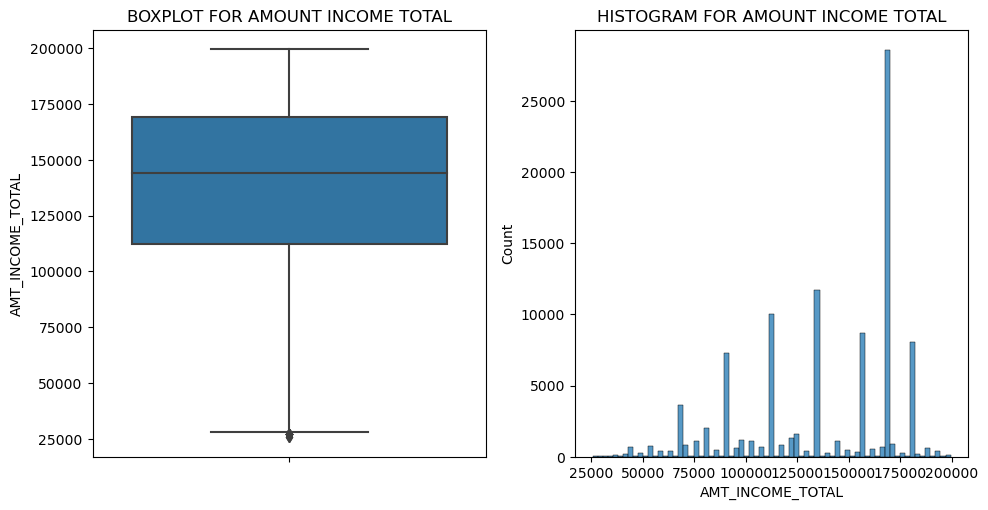

In [46]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.boxplot(y=num['AMT_INCOME_TOTAL'],ax=ax[0])
sb.histplot(x=num['AMT_INCOME_TOTAL'],ax=ax[1])
plt.tight_layout()
ax[0].set_title('BOXPLOT FOR AMOUNT INCOME TOTAL')
ax[1].set_title('HISTOGRAM FOR AMOUNT INCOME TOTAL')
plt.show()

# Almost lot of peoples income comes 100000 to 175000.
* Minimum value - 25000
* maximum value - 200000
* 50% values between 120000 to 170000
* Median - 140000

# 5. DAYS EMPLOYEED

In [47]:
num['DAYS_EMPLOYED'].mean()

63292.22206

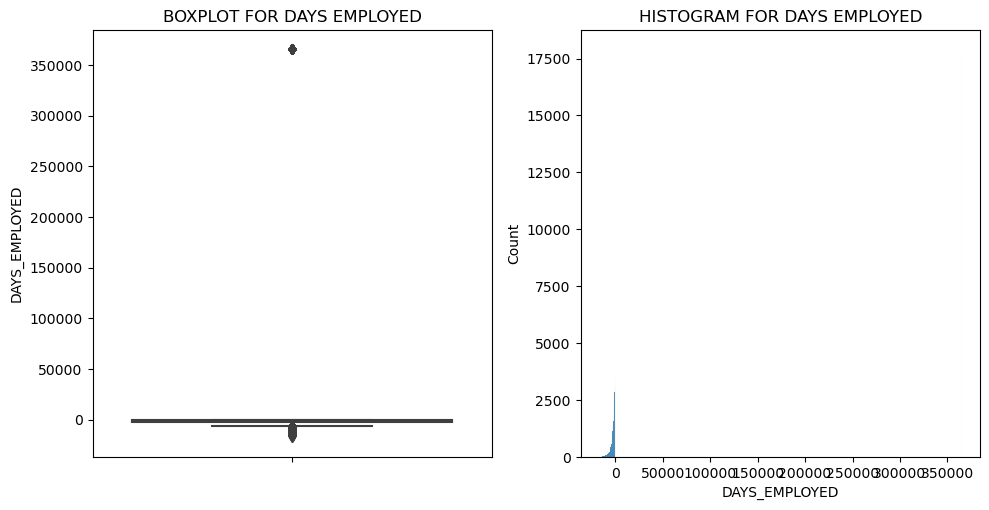

In [48]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.boxplot(y=num['DAYS_EMPLOYED'],ax=ax[0])
sb.histplot(x=num['DAYS_EMPLOYED'],ax=ax[1])
plt.tight_layout()
ax[0].set_title('BOXPLOT FOR DAYS EMPLOYED')
ax[1].set_title('HISTOGRAM FOR DAYS EMPLOYED')
plt.show()

In [49]:
mean=num['DAYS_EMPLOYED'].mean()
s=num[num['DAYS_EMPLOYED']>0].index
for index in s:
    num.loc[index,'DAYS_EMPLOYED']=mean

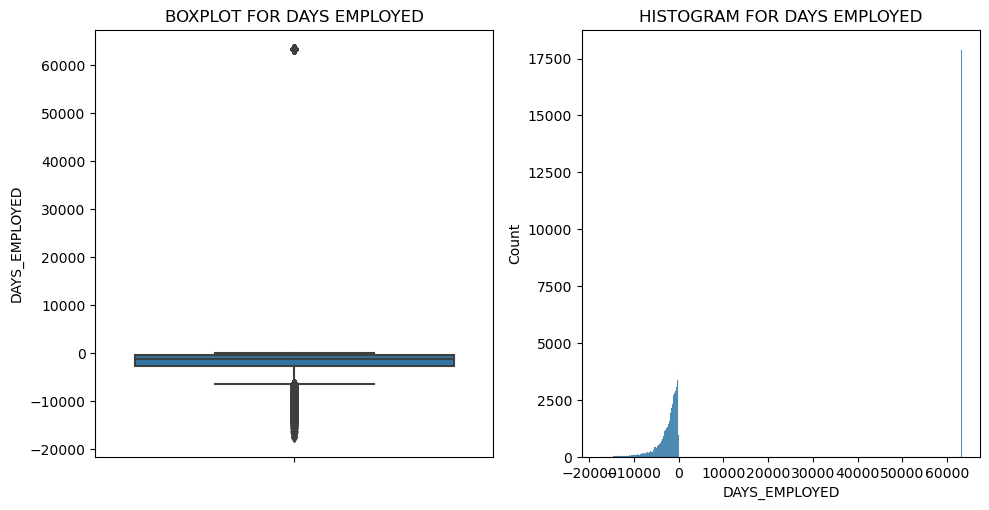

In [50]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.boxplot(y=num['DAYS_EMPLOYED'],ax=ax[0])
sb.histplot(x=num['DAYS_EMPLOYED'],ax=ax[1])
plt.tight_layout()
ax[0].set_title('BOXPLOT FOR DAYS EMPLOYED')
ax[1].set_title('HISTOGRAM FOR DAYS EMPLOYED')
plt.show()

# Lot of persons working near by 5000 days.
* Minimum value - 500
* maximum value - 7000
* 50% values between  500 to 2500
* Median - 1500

# LEVEL 2 ANALYSIS -- UniVariate Analysis

In [51]:
bank.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [52]:
cat.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [53]:
num.columns

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'DAYS_EMPLOYED'],
      dtype='object')

# TARGET VS 
        * CNT FAMILY MEMERS
        * CNT CHILDRENS

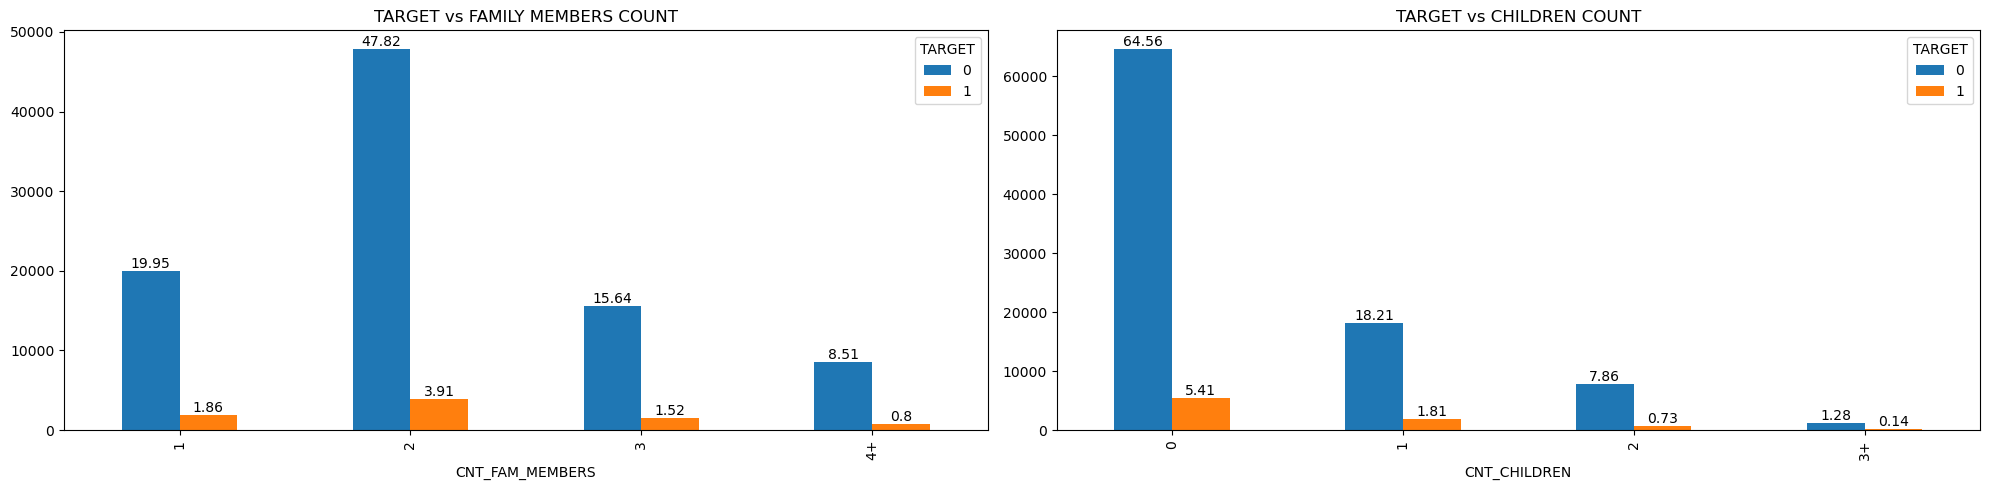

In [56]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
pd.crosstab(index=bank['CNT_FAM_MEMBERS'],columns=bank['TARGET']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=bank['CNT_CHILDREN'],columns=bank['TARGET']).plot(kind='bar',ax=ax[1])
cp(ax[0],bank)
cp(ax[1],bank)
ax[0].set_title('TARGET vs FAMILY MEMBERS COUNT')
ax[1].set_title('TARGET vs CHILDREN COUNT')
plt.tight_layout()
plt.show()

#
* In 2 members family 48% pay properly.
* 65% paying on time who dont have child.

# TARGET VS 
        * APPLICATION DAY
        * CAR

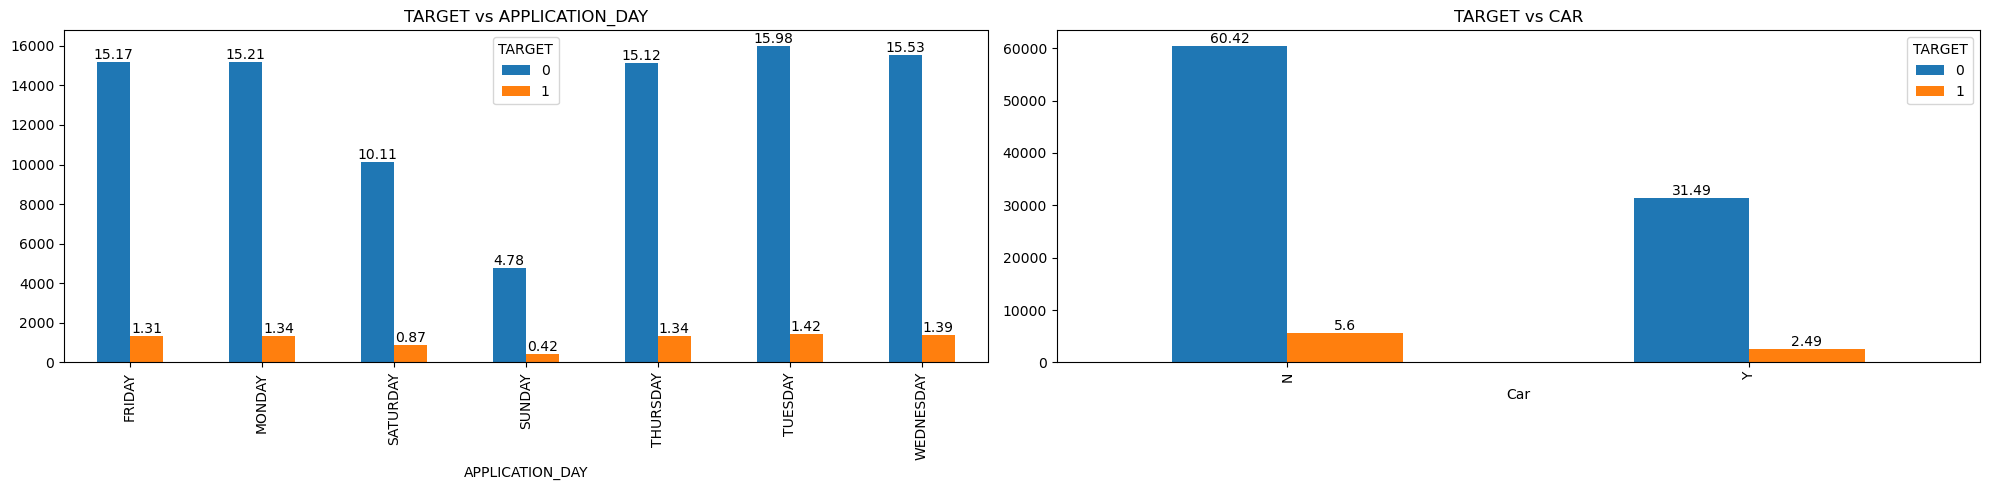

In [55]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
pd.crosstab(index=bank['APPLICATION_DAY'],columns=bank['TARGET']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=bank['Car'],columns=bank['TARGET']).plot(kind='bar',ax=ax[1])
cp(ax[0],bank)
cp(ax[1],bank)
ax[0].set_title('TARGET vs APPLICATION_DAY')
ax[1].set_title('TARGET vs CAR')
plt.tight_layout()
plt.show()

#
* Day Doesnt affect the repayment. Even through Tuesday and Wednesday who get loan they are paying properly.
* 60 % peoples dont have car but they pay on time.

# TARGET VS 
        * GENDER
        * HOUSE

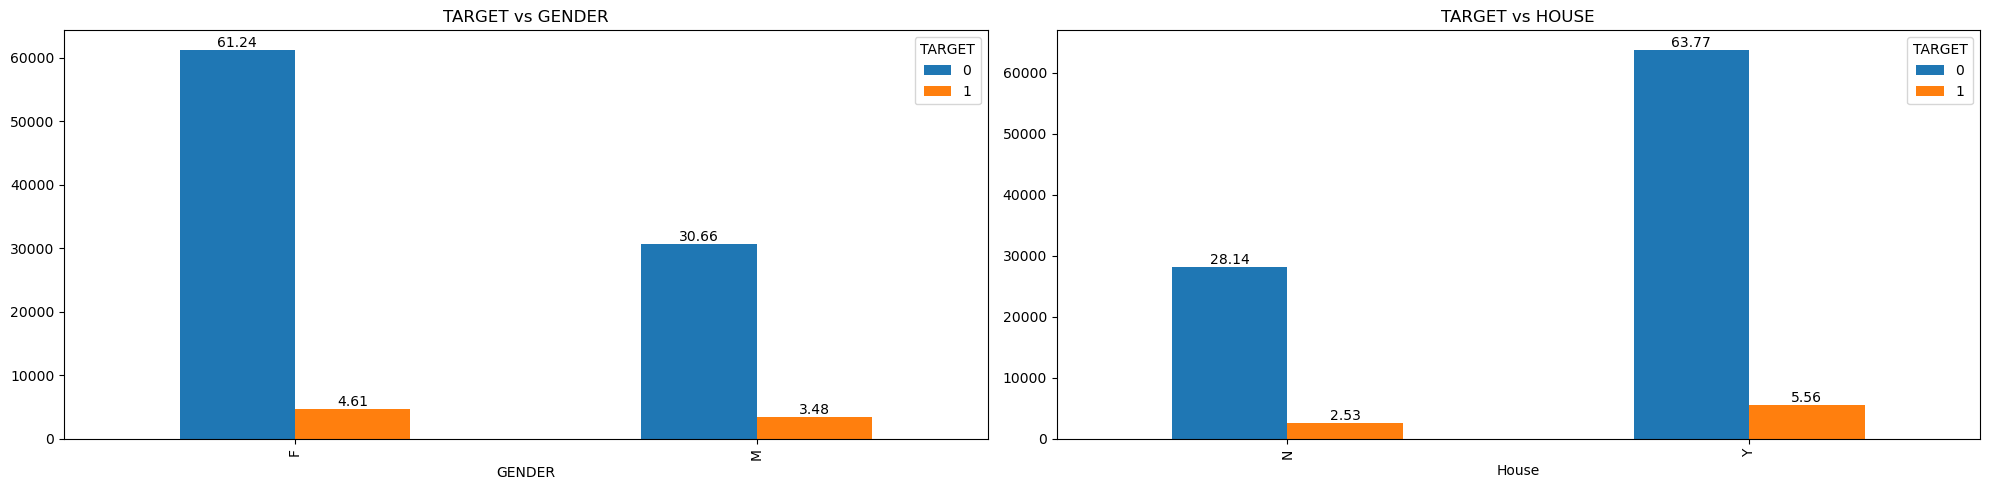

In [56]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
pd.crosstab(index=bank['GENDER'],columns=bank['TARGET']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=bank['House'],columns=bank['TARGET']).plot(kind='bar',ax=ax[1])
cp(ax[0],bank)
cp(ax[1],bank)
ax[0].set_title('TARGET vs GENDER')
ax[1].set_title('TARGET vs HOUSE')
plt.tight_layout()
plt.show()

# 
* Alomost 61% female pay on time.
* 64% who have house they pay on time.

# TARGET VS 
        * MOBILE
        * MOBILE REACHABLE

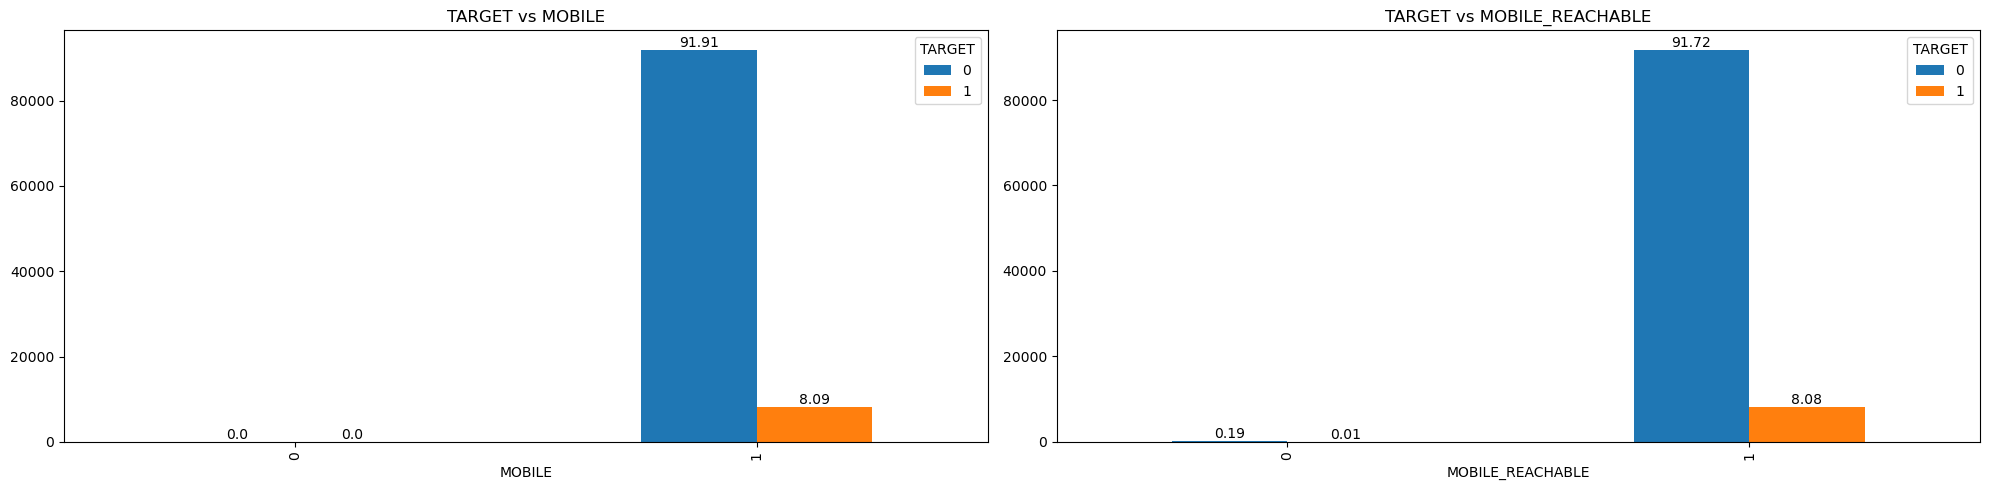

In [57]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
pd.crosstab(index=bank['MOBILE'],columns=bank['TARGET']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=bank['MOBILE_REACHABLE'],columns=bank['TARGET']).plot(kind='bar',ax=ax[1])
cp(ax[0],bank)
cp(ax[1],bank)
ax[0].set_title('TARGET vs MOBILE')
ax[1].set_title('TARGET vs MOBILE_REACHABLE')
plt.tight_layout()
plt.show()

#
* 92% people paying on time they have mobile.
* 92% peoples phone reachable they pay on time.

# TARGET VS 
        * NAME CONTRACT TYPE
        * OCCUPATION TYPE

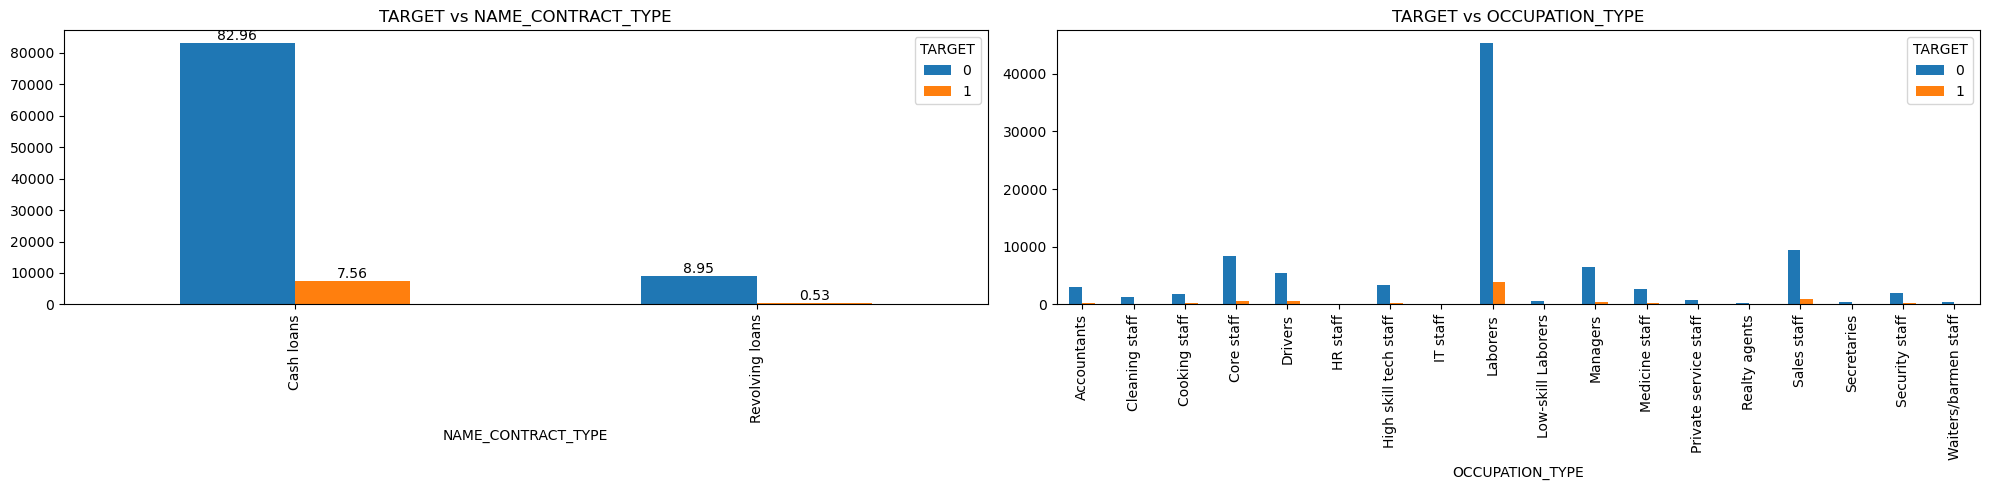

In [57]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
pd.crosstab(index=bank['NAME_CONTRACT_TYPE'],columns=bank['TARGET']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=bank['OCCUPATION_TYPE'],columns=bank['TARGET']).plot(kind='bar',ax=ax[1])
cp(ax[0],bank)
ax[0].set_title('TARGET vs NAME_CONTRACT_TYPE')
ax[1].set_title('TARGET vs OCCUPATION_TYPE')
plt.tight_layout()
plt.show()

# 
* 83% cash loan repay on time
* 45 % labours are pay loan on time. 

# TARGET VS 
        * NAME EDUCATION TYPE
        * NAME FAMILY TYPE

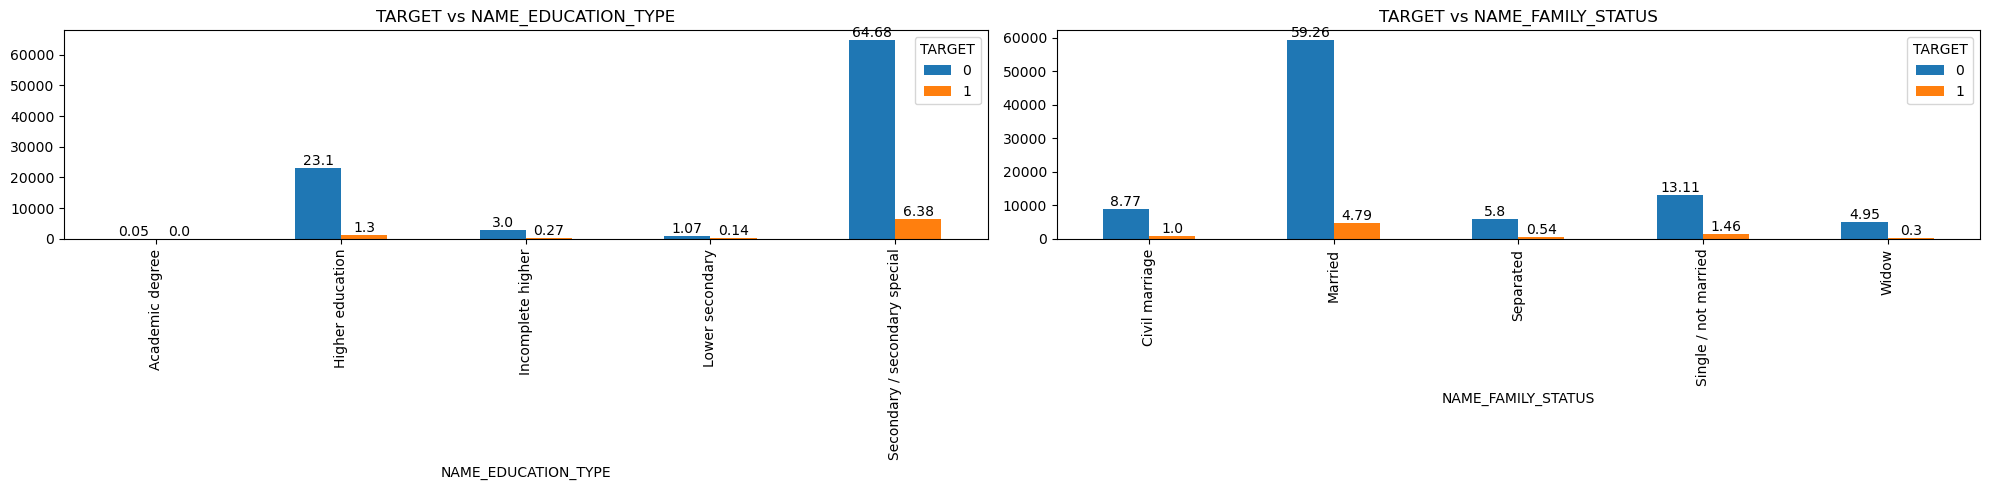

In [59]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
pd.crosstab(index=bank['NAME_EDUCATION_TYPE'],columns=bank['TARGET']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=bank['NAME_FAMILY_STATUS'],columns=bank['TARGET']).plot(kind='bar',ax=ax[1])
cp(ax[0],bank)
cp(ax[1],bank)
ax[0].set_title('TARGET vs NAME_EDUCATION_TYPE')
ax[1].set_title('TARGET vs NAME_FAMILY_STATUS')
plt.tight_layout()
plt.show()

# 
* 65 % secondary special study peoples pay on time.
* 59 % married peoples pay on time.

# TARGET VS 
        * NAME INCOME TYPE
        * NAME TYPE SUITE

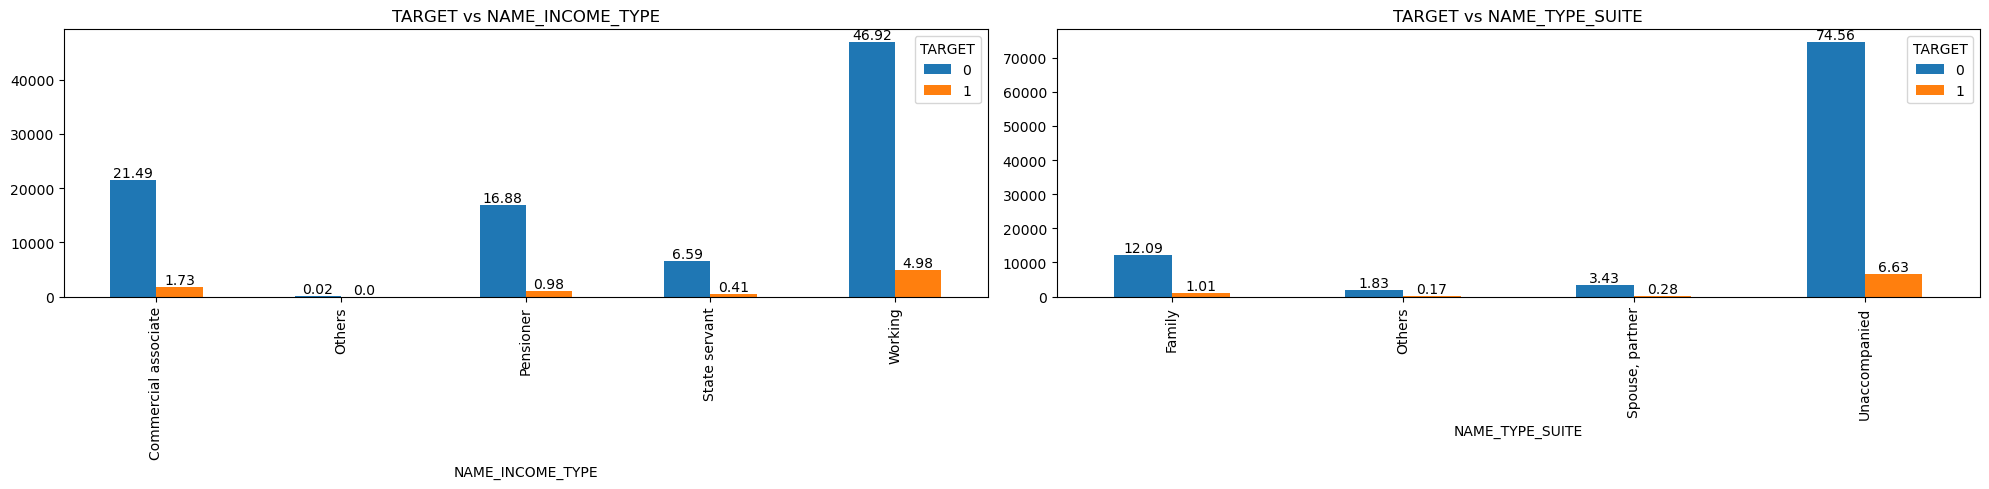

In [60]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
pd.crosstab(index=bank['NAME_INCOME_TYPE'],columns=bank['TARGET']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=bank['NAME_TYPE_SUITE'],columns=bank['TARGET']).plot(kind='bar',ax=ax[1])
cp(ax[0],bank)
cp(ax[1],bank)
ax[0].set_title('TARGET vs NAME_INCOME_TYPE')
ax[1].set_title('TARGET vs NAME_TYPE_SUITE')
plt.tight_layout()
plt.show()

# 
* 47% working peoples are pay on time.
* 75 % unaccompanied peoples are repay on time.

# TARGET VS 
        * TOTAL DOC SUBMITTED
        * WORK PHONE

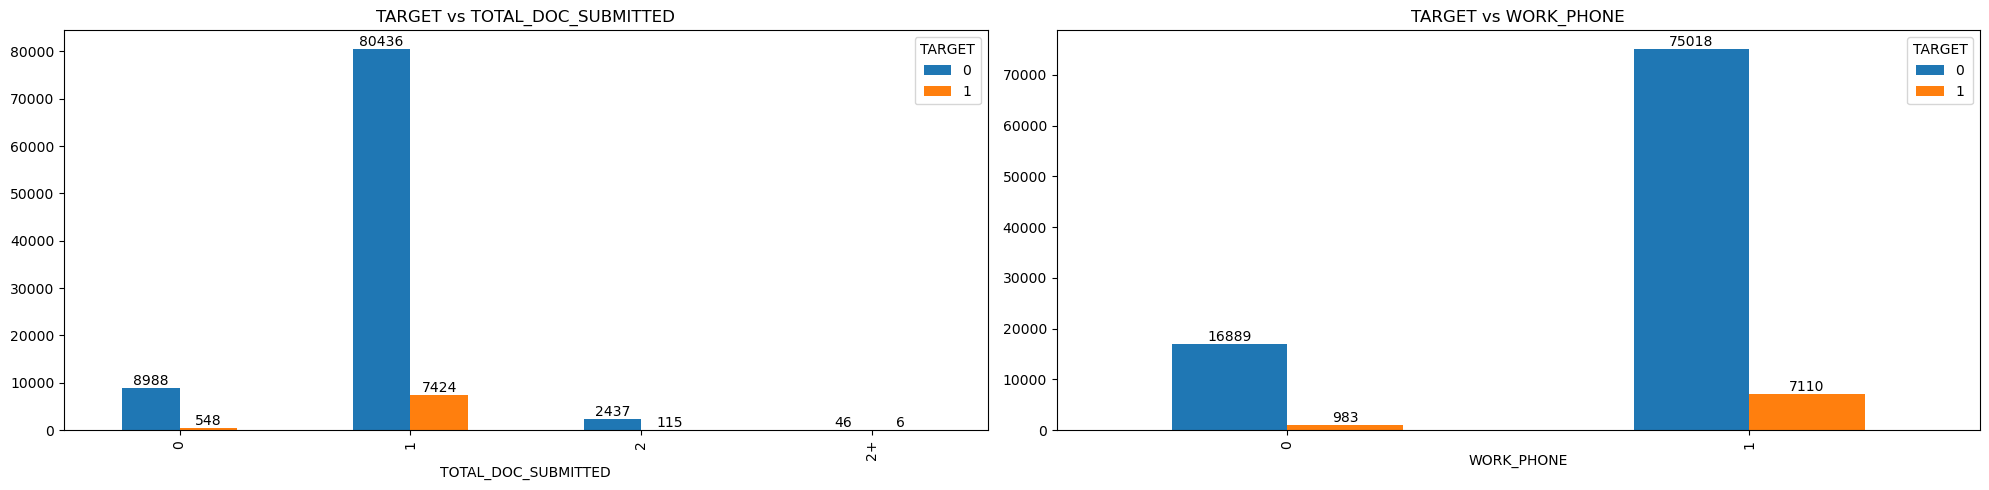

In [61]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
pd.crosstab(index=bank['TOTAL_DOC_SUBMITTED'],columns=bank['TARGET']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=bank['WORK_PHONE'],columns=bank['TARGET']).plot(kind='bar',ax=ax[1])
cb(ax[0],bank)
cb(ax[1],bank)
ax[0].set_title('TARGET vs TOTAL_DOC_SUBMITTED')
ax[1].set_title('TARGET vs WORK_PHONE')
plt.tight_layout()
plt.show()

#
* 80% of peoples only 1 document submited. but they pay on time.
* 75 % people have work phone and pay also on time.

# LEVEL 3 ANALYSIS -- MultiVariate Anlaysis

In [62]:
bank.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

# Who are become a low defaulter using their family members count with their income 

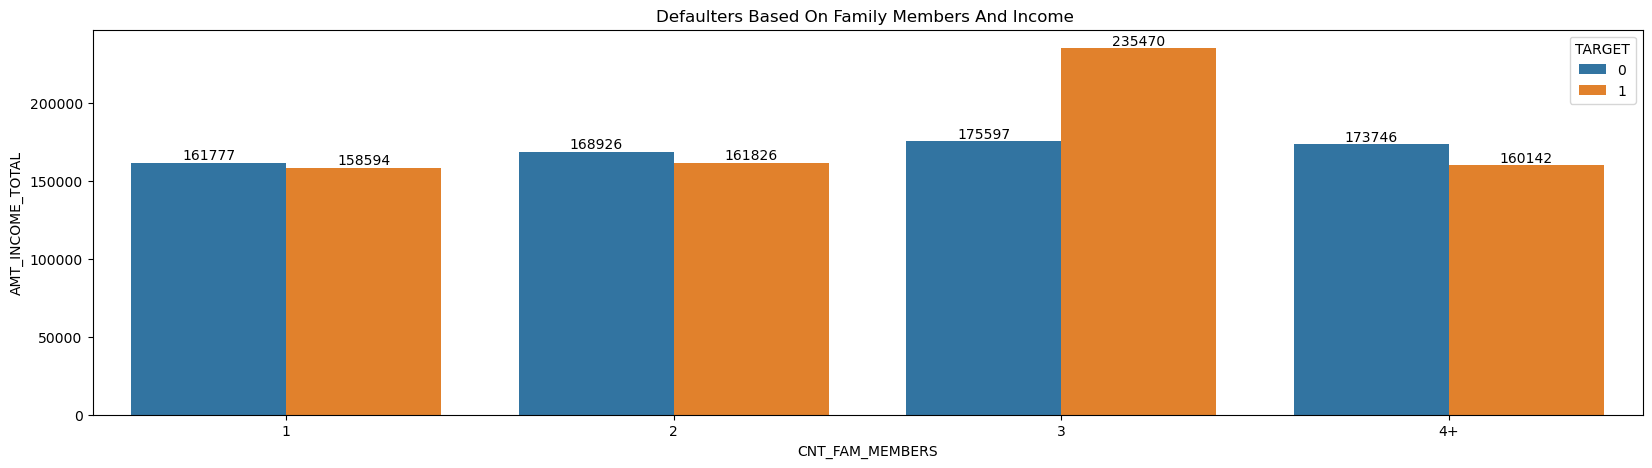

In [63]:
fig,ax=plt.subplots(figsize=(20,5))
sb.barplot(x=bank['CNT_FAM_MEMBERS'],y=bank['AMT_INCOME_TOTAL'],hue=bank['TARGET'],ci=False)
cb(ax,bank)
plt.title('Defaulters Based On Family Members And Income ')
plt.show()

#
* Family members count which family have 2 members. They are low probabelity to become a defaulter.
* Family members count which family have 3 members. They are high probabelity to become a defaulter.

# Who are become a low defaulter using their children  count with their income

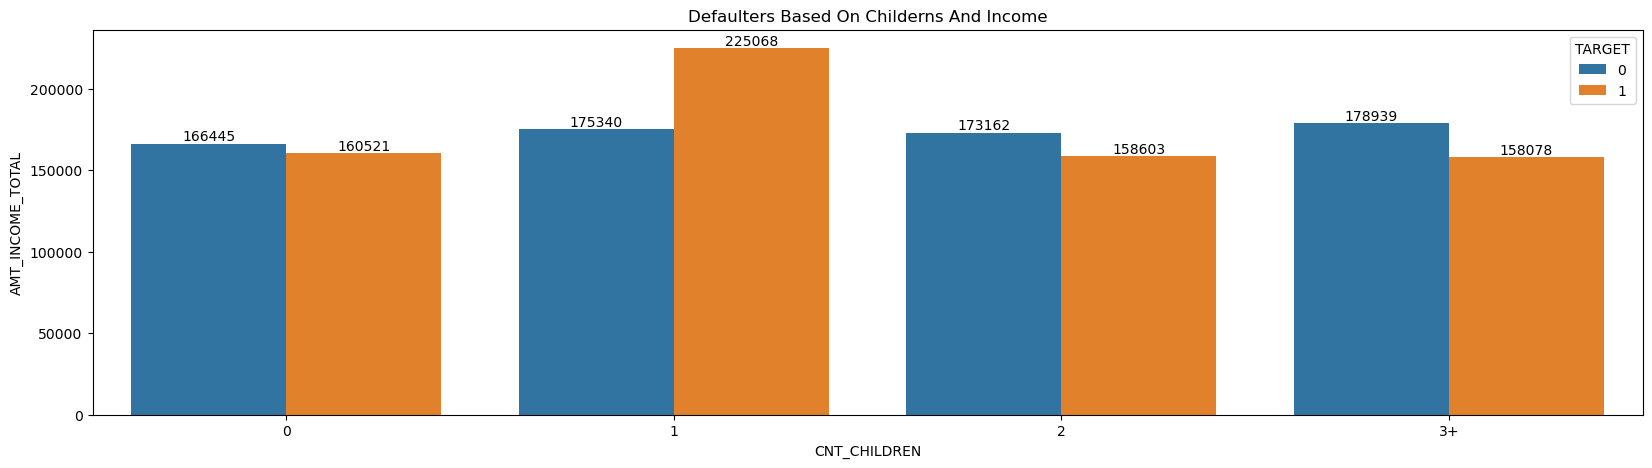

In [64]:
fig,ax=plt.subplots(figsize=(20,5))
sb.barplot(x=bank['CNT_CHILDREN'],y=bank['AMT_INCOME_TOTAL'],hue=bank['TARGET'],ci=False)
cb(ax,bank)
plt.title('Defaulters Based On Childerns And Income')
plt.show()

#
* Who have 2 children they are probabelity to be a low defaulter.
* Who have a one child high probabelity to be defaulter.

# How we find low defaulter using their income type and income.

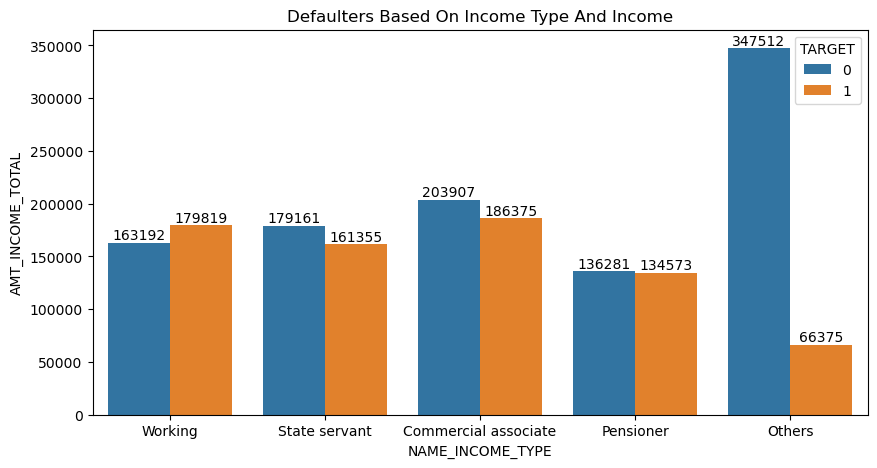

In [65]:
fig,ax=plt.subplots(figsize=(10,5))
sb.barplot(x=bank['NAME_INCOME_TYPE'],y=bank['AMT_INCOME_TOTAL'],hue=bank['TARGET'],ci=False)
cb(ax,bank)
plt.title('Defaulters Based On Income Type And Income')
plt.show()

# 
* Who are under the others and State servant are be a low defaulter.
* Working persons high possibality to be a defaulter.

# Which gender be a defaulter using their income.

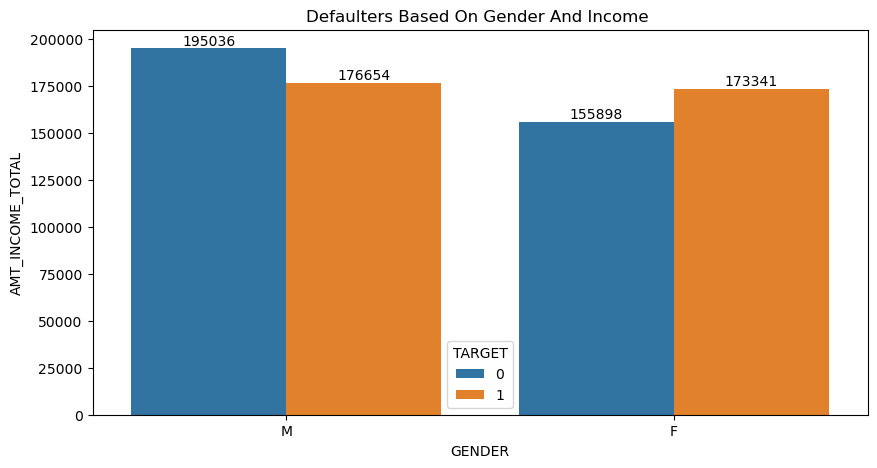

In [66]:
fig,ax=plt.subplots(figsize=(10,5))
sb.barplot(x=bank['GENDER'],y=bank['AMT_INCOME_TOTAL'],hue=bank['TARGET'],ci=False)
cb(ax,bank)
plt.title('Defaulters Based On Gender And Income ')
plt.show()

# 
* Males are low probabelity to become a defaulter.
* Females are high probabelity to become a defaulter.

# Find the defaulter using their  house 

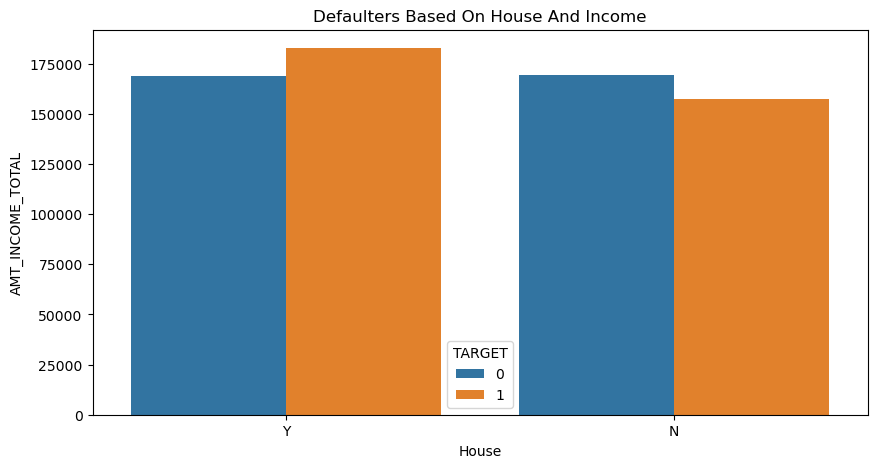

In [67]:
fig,ax=plt.subplots(figsize=(10,5))
sb.barplot(x=bank['House'],y=bank['AMT_INCOME_TOTAL'],hue=bank['TARGET'],ci=False)
plt.title('Defaulters Based On House And Income')
plt.show()

# 
* Who have not a house they are low probabelity to become a defaulter.
* Who have  a house they are high probabelity to become a defaulter.

# Find the defaulter using their car 

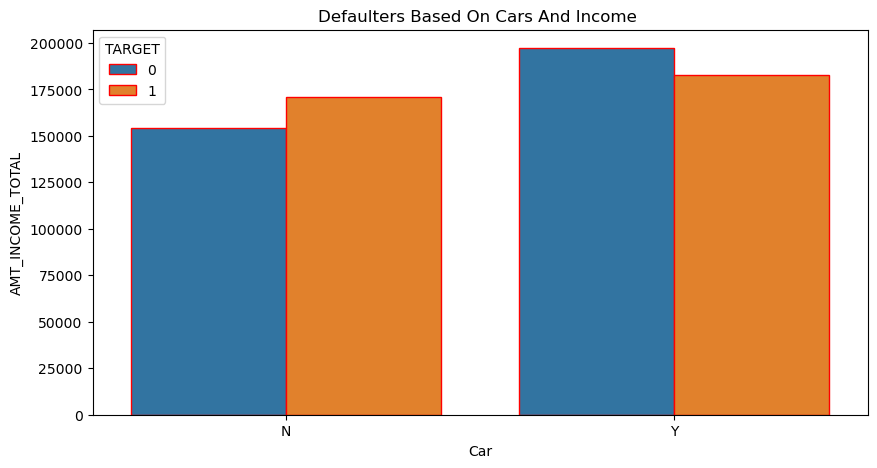

In [68]:
fig,ax=plt.subplots(figsize=(10,5))
sb.barplot(x=bank['Car'],y=bank['AMT_INCOME_TOTAL'],hue=bank['TARGET'],ci=False,edgecolor='red')
plt.title('Defaulters Based On Cars And Income ')
plt.show()

# 
* Who have cars they are low probabelity to become a defaulters.
* Who doesn't have cars they are high probabelity to become a defaulters.

# Finding defaulters their education type and income

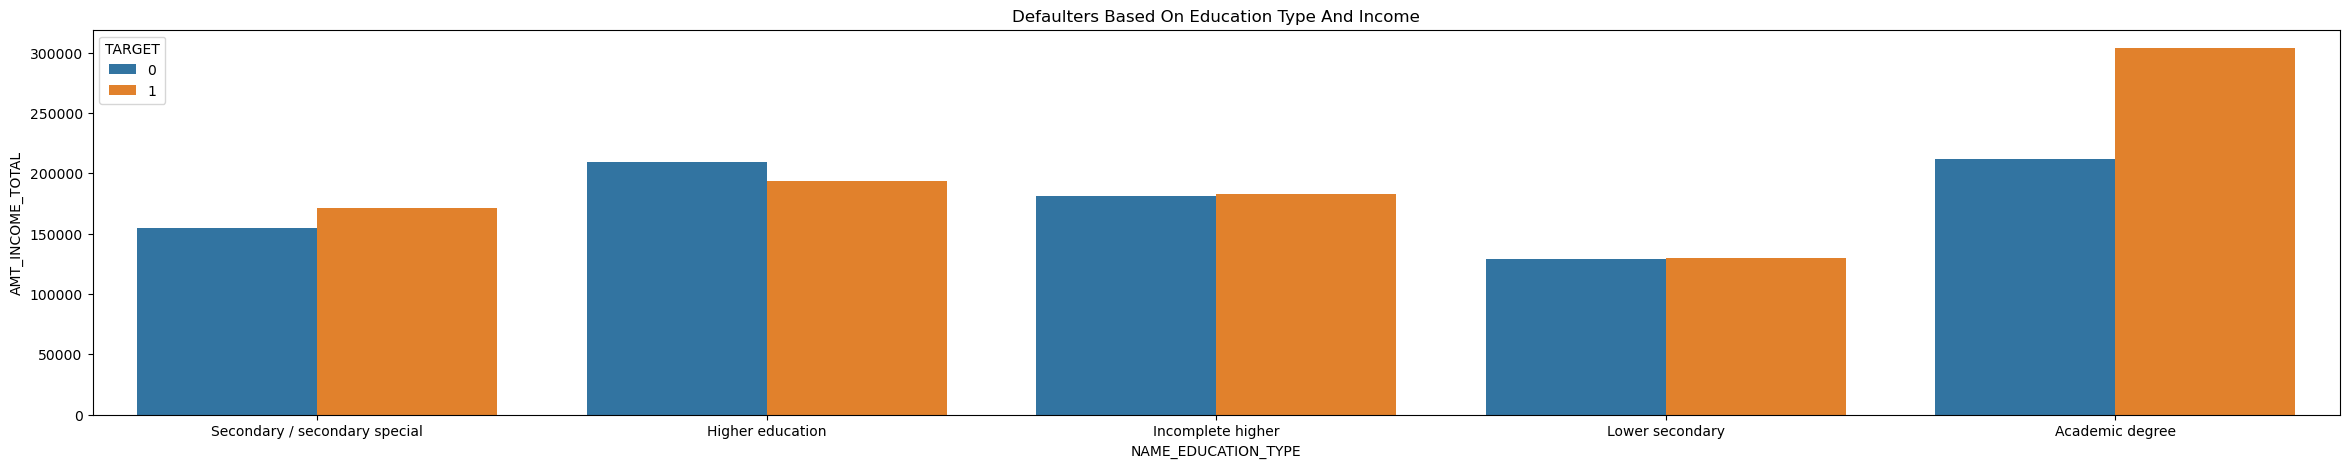

In [69]:
fig,ax=plt.subplots(figsize=(29,5))
sb.barplot(x=bank['NAME_EDUCATION_TYPE'],y=bank['AMT_INCOME_TOTAL'],hue=bank['TARGET'],ci=False)
plt.title('Defaulters Based On Education Type And Income')
plt.show()

# 
* Higher education studied applicant low possibility become a defaulter.
* Acadamic degree and secondary are high possibility to become a defaulter.

# Who are become a defaulter using their occupation and income

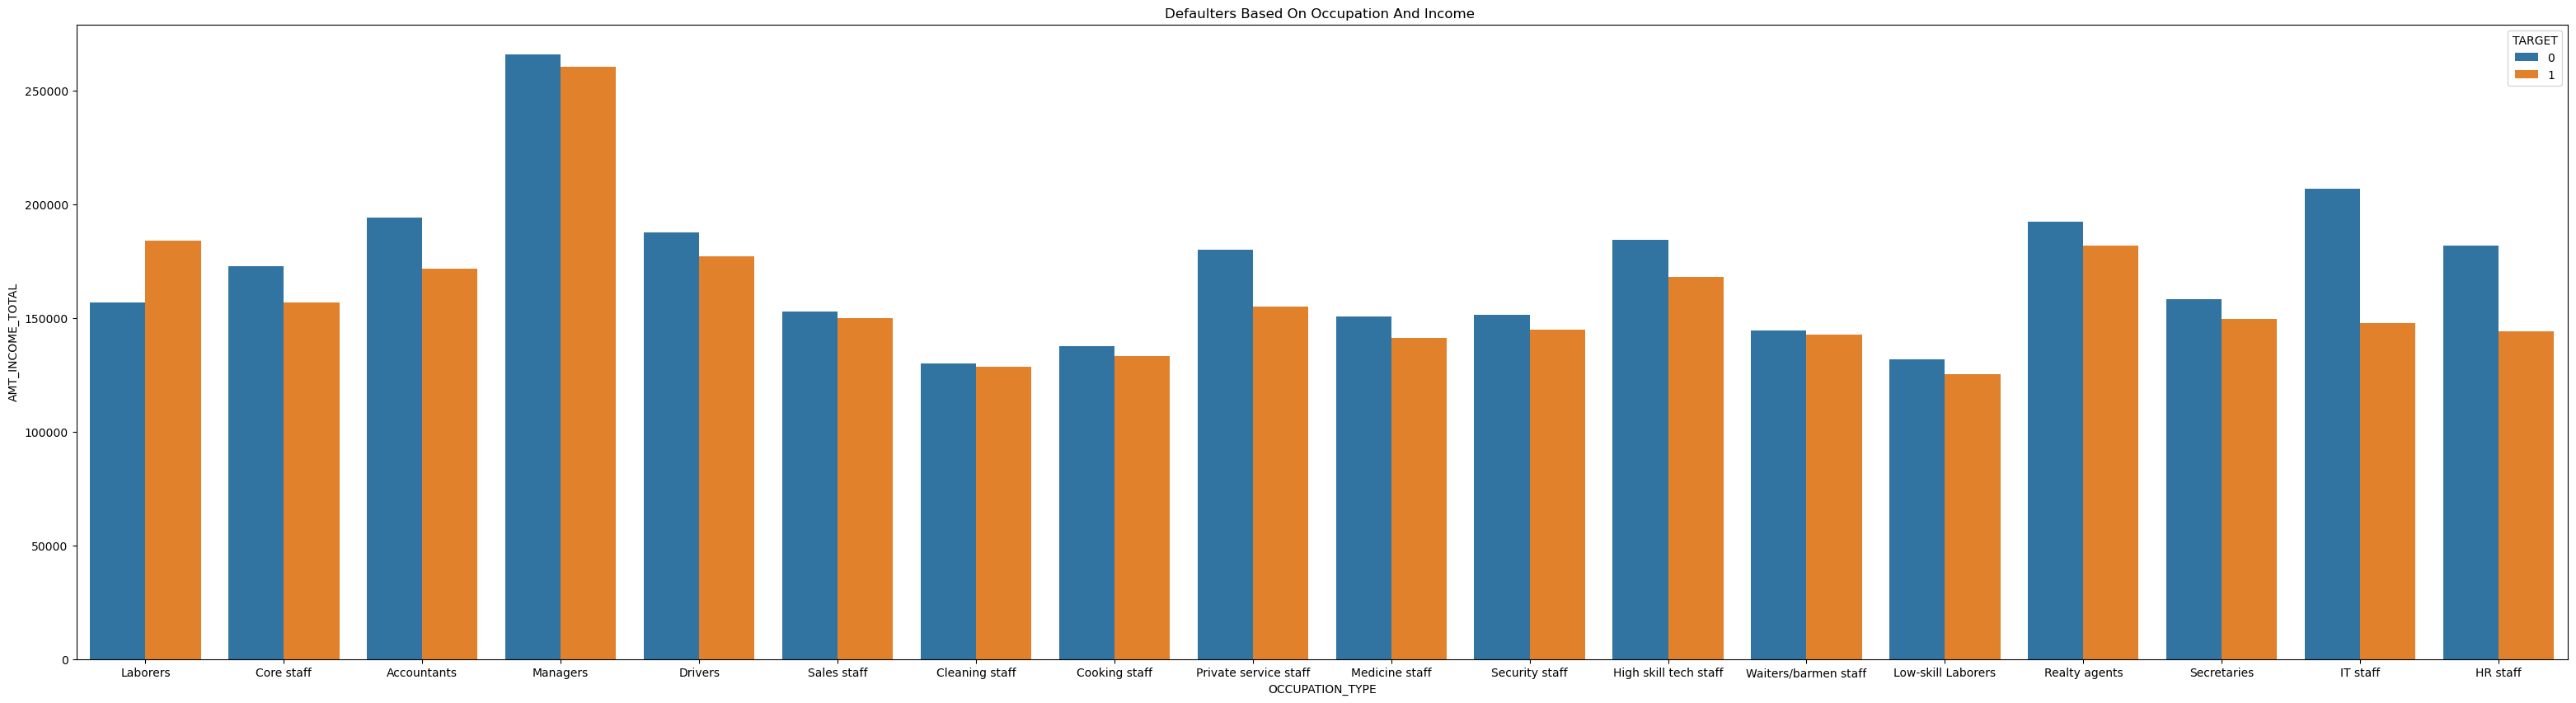

In [59]:
fig,ax=plt.subplots(figsize=(39,10))
sb.barplot(x=bank['OCCUPATION_TYPE'],y=bank['AMT_INCOME_TOTAL'],hue=bank['TARGET'],ci=False)
plt.title('Defaulters Based On Occupation And Income ')
plt.show()

#
* Manager, core staff, accountant,drivers,private service staff, Hr and It staff are low probabelity to become a defaulter.
* Laborers high possibility become a defaulter.

# Finding defaulters using loan type

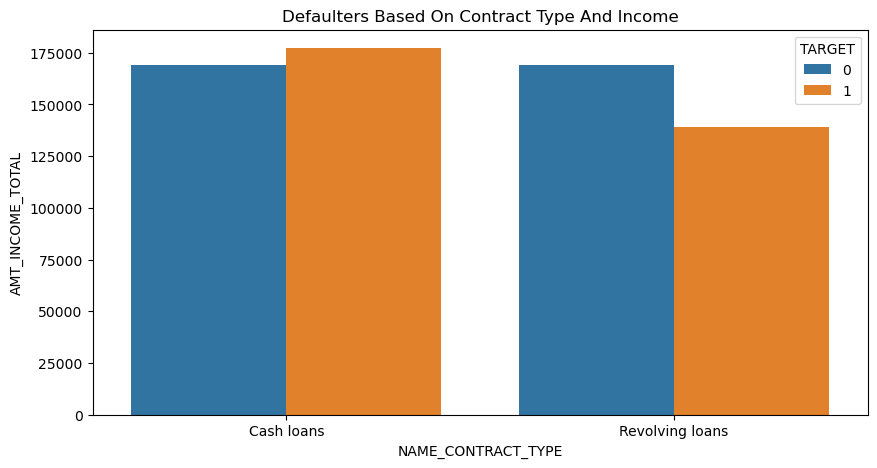

In [71]:
fig,ax=plt.subplots(figsize=(10,5))
sb.barplot(x=bank['NAME_CONTRACT_TYPE'],y=bank['AMT_INCOME_TOTAL'],hue=bank['TARGET'],ci=False)
plt.title('Defaulters Based On Contract Type And Income')
plt.show()

#
* Rovolving loans are low probability to become a defaulter.
* Cash loans are high probability to become a defaulter.

# Who are low defaulter using the amt credit vs gender and car

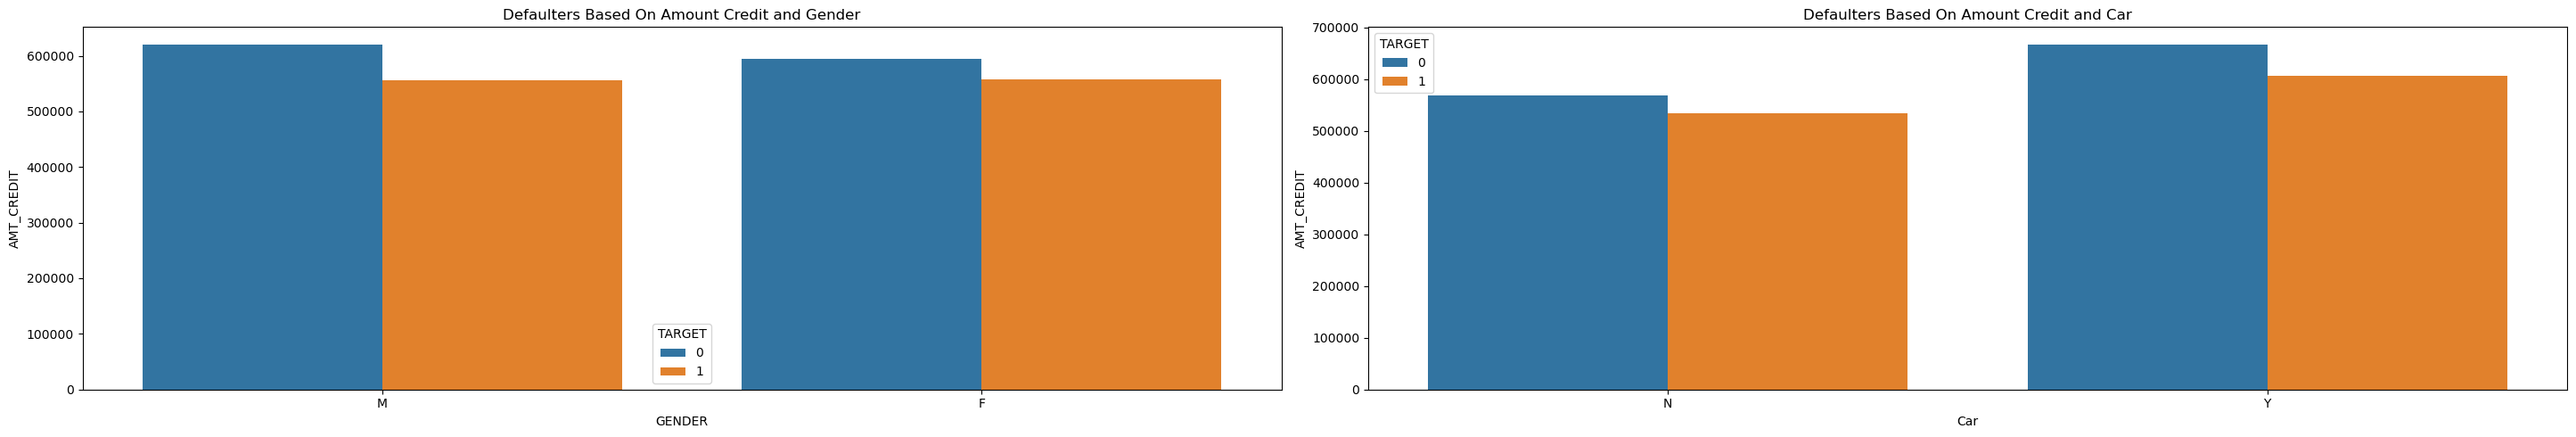

In [72]:
fig,ax=plt.subplots(1,2,figsize=(29,5))
sb.barplot(x=bank['GENDER'],y=bank['AMT_CREDIT'],hue=bank['TARGET'],ci=False,ax=ax[0])
sb.barplot(x=bank['Car'],y=bank['AMT_CREDIT'],hue=bank['TARGET'],ci=False,ax=ax[1])
ax[0].set_title('Defaulters Based On Amount Credit and Gender')
ax[1].set_title('Defaulters Based On Amount Credit and Car')
plt.tight_layout()
plt.show()

#
* Lot of male become a low defaulter using amount credit.
* Who have the car they are low possible to become a defaulter using amount credit.

# Who are low defaulter using the amt credit vs children and Family

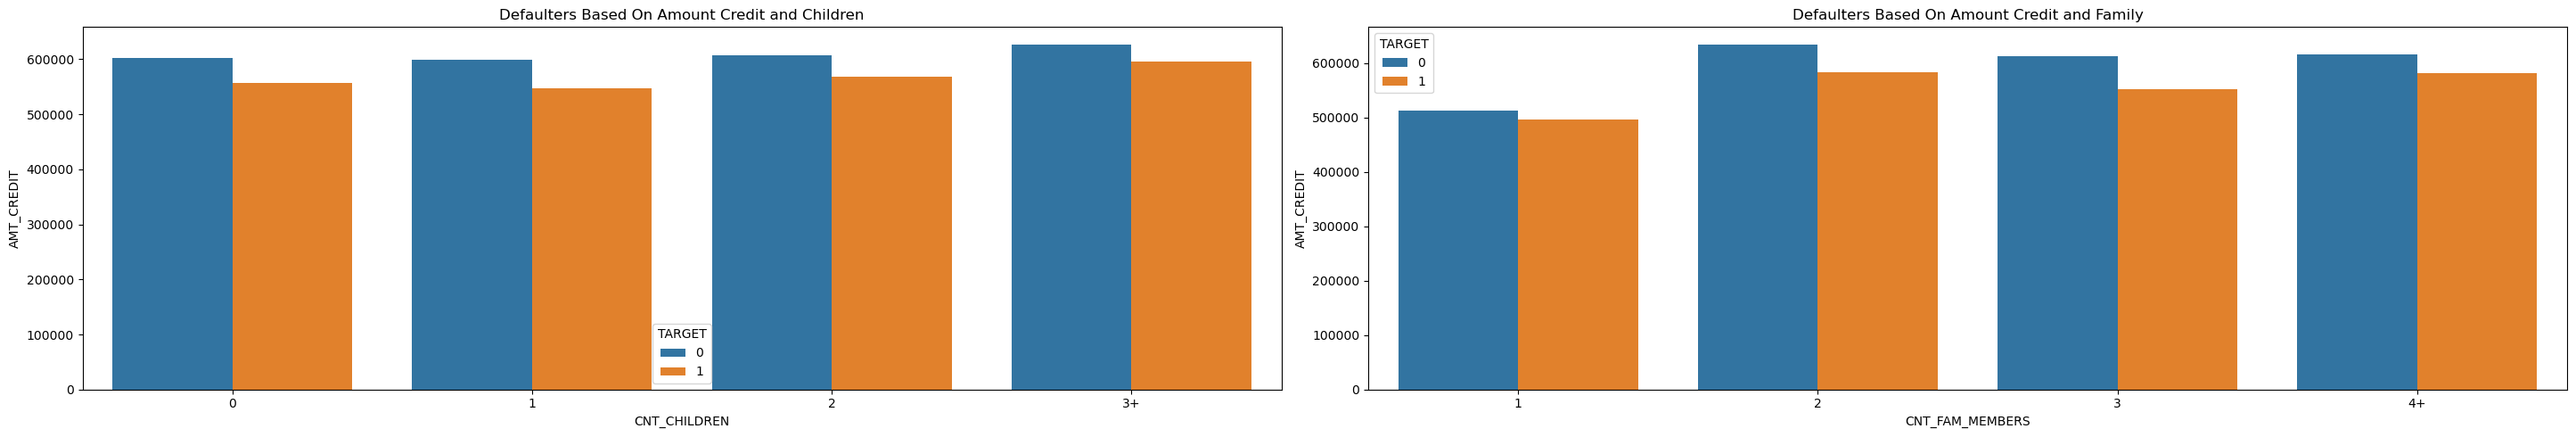

In [73]:
fig,ax=plt.subplots(1,2,figsize=(29,5))
sb.barplot(x=bank['CNT_CHILDREN'],y=bank['AMT_CREDIT'],hue=bank['TARGET'],ci=False,ax=ax[0])
sb.barplot(x=bank['CNT_FAM_MEMBERS'],y=bank['AMT_CREDIT'],hue=bank['TARGET'],ci=False,ax=ax[1])
ax[0].set_title('Defaulters Based On Amount Credit and Children')
ax[1].set_title('Defaulters Based On Amount Credit and Family')
plt.tight_layout()
plt.show()

# 
* Amount credit and children doesn't affect the become a defaulter.
* Amount credit and family members doesn't affect the become a defaulter.But one family member littlebit possible to become a defaulter.

# Who are  defaulter using the amt credit vs education type and Family status

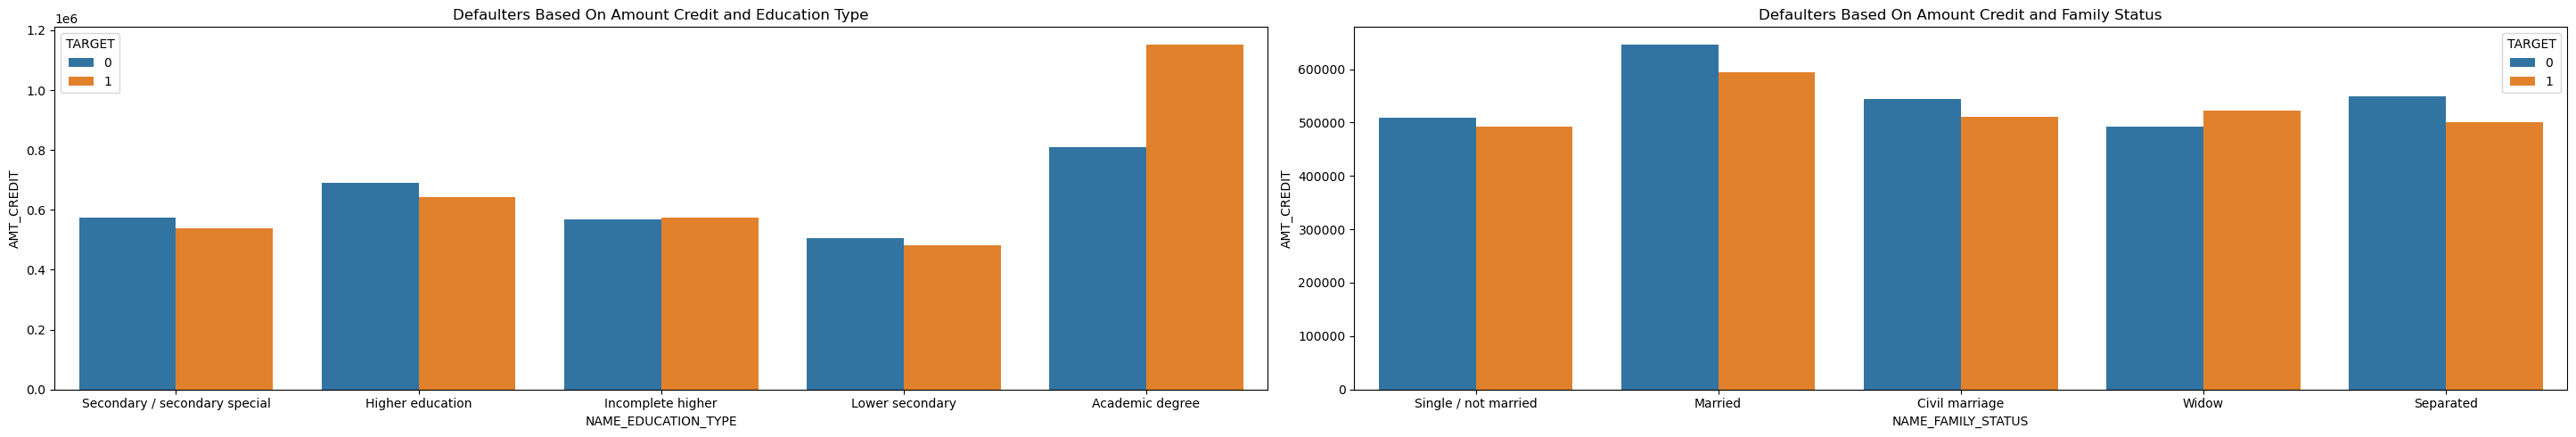

In [74]:
fig,ax=plt.subplots(1,2,figsize=(29,5))
sb.barplot(x=bank['NAME_EDUCATION_TYPE'],y=bank['AMT_CREDIT'],hue=bank['TARGET'],ci=False,ax=ax[0])
sb.barplot(x=bank['NAME_FAMILY_STATUS'],y=bank['AMT_CREDIT'],hue=bank['TARGET'],ci=False,ax=ax[1])
ax[0].set_title('Defaulters Based On Amount Credit and Education Type')
ax[1].set_title('Defaulters Based On Amount Credit and Family Status')
plt.tight_layout()
plt.show()

#
* Higher education high possible to become a low defaulter. and Academic degree who have high possible to become a high defaulter using amount credit.
* Who are married they are probability to become a low defaulter. Who are Widow they are become a high defaulter.

# Who are  defaulter using the amt credit vs document submiited 

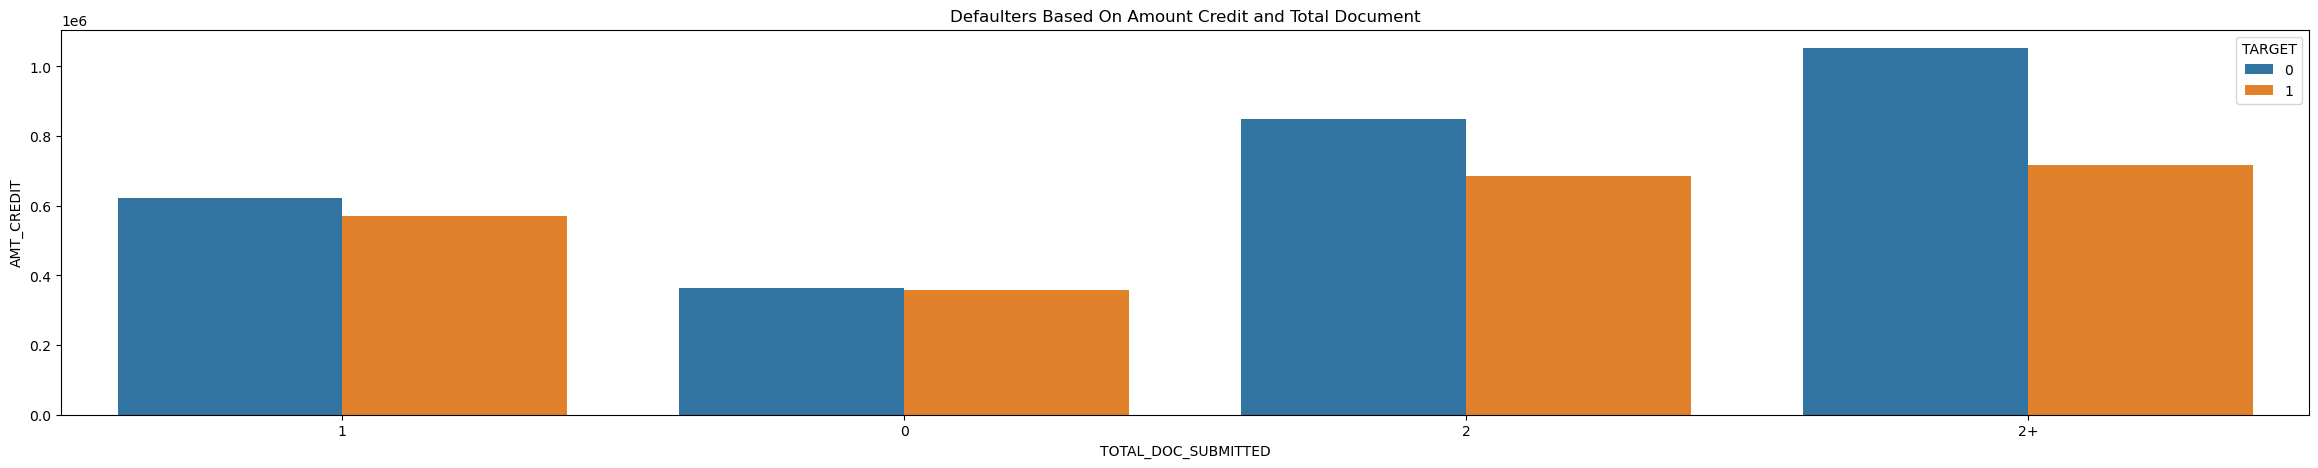

In [75]:
fig,ax=plt.subplots(figsize=(29,5))
sb.barplot(x=bank['TOTAL_DOC_SUBMITTED'],y=bank['AMT_CREDIT'],hue=bank['TARGET'],ci=False)
plt.title('Defaulters Based On Amount Credit and Total Document')
plt.show()

# 
* Who Are submitted More than 2 and 2+ document They are low possibity to become a defaulter bassed on amount credit.

# Who are low defaulter using the amt credit vs occupation type

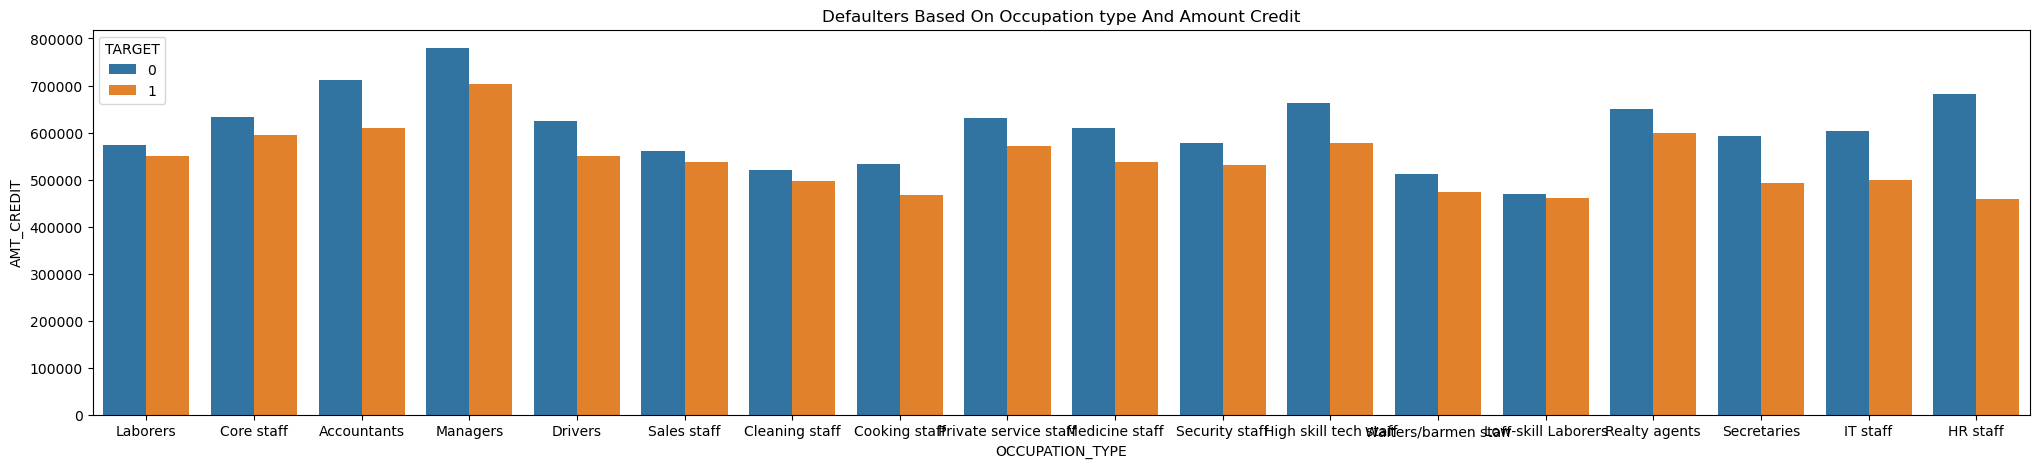

In [76]:
fig,ax=plt.subplots(figsize=(25,5))
sb.barplot(x=bank['OCCUPATION_TYPE'],y=bank['AMT_CREDIT'],hue=bank['TARGET'],ci=False)
plt.title("Defaulters Based On Occupation type And Amount Credit")
plt.show()

# 
* Credit amount and occupation not affect the become a defaulter.

# Who are low defaulter using the amt good price vs children and Family

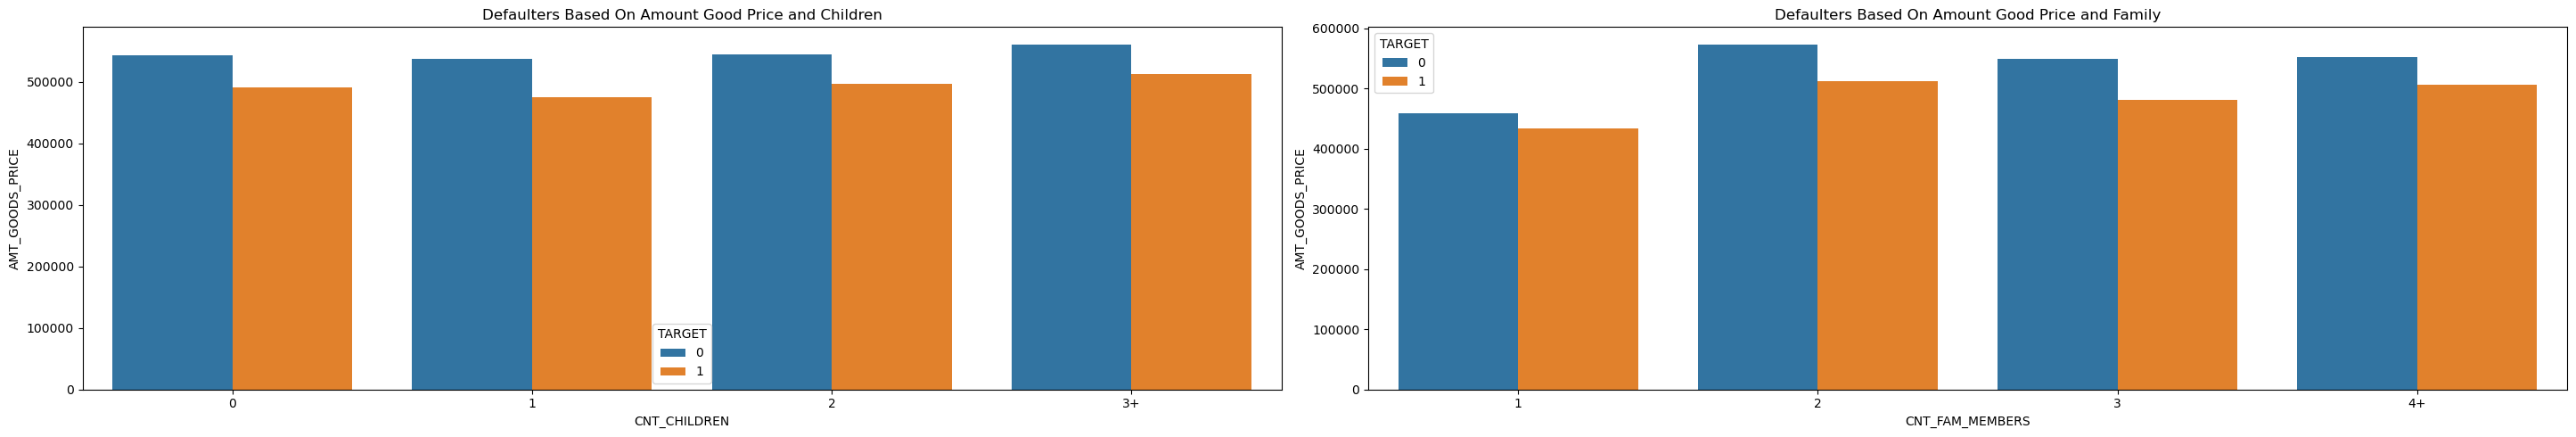

In [77]:
fig,ax=plt.subplots(1,2,figsize=(29,5))
sb.barplot(x=bank['CNT_CHILDREN'],y=bank['AMT_GOODS_PRICE'],hue=bank['TARGET'],ci=False,ax=ax[0])
sb.barplot(x=bank['CNT_FAM_MEMBERS'],y=bank['AMT_GOODS_PRICE'],hue=bank['TARGET'],ci=False,ax=ax[1])
ax[0].set_title('Defaulters Based On Amount Good Price and Children')
ax[1].set_title('Defaulters Based On Amount Good Price and Family')
plt.tight_layout()
plt.show()

# 
* Children and family count doesnt affect the defaulter based on Amount Good price.

# Interpretation -- Level 1
**UniVariate**
* Lot Of Application Submitted In Tuesday
* Near By 34 % People Only Have Car
* 66% customers are Female
* Near by 70% people have own house.
* Near by 91% peoples gets cash loans.
* Maximum No of peoples study only secondary or secondary special
* Lot of married persons apply for the loan
* Maximum peoples are working
* Unaccompained peoples are apply the loan near by 82%
* 50% Laborers are apply the loan
* Almost 92% peoples paying good
* Near by 70 % peoples dont have a child
* Almost all are have a mobile.
* Near by 82% people have work phone.
* Near by 80% people have home phone
* Almost all are mobile reachable.
* 95% people share their email.
* Near by 52% family have 2 family members.
* 88% peoples submitted only one document.
* Almost lot of people wants their loan amount range between 45000 to 150000.Customers Good price amount range between 10000 to 130000.
* Almost lot of peoples income comes 100000 to 175000.
* Lot of persons working near by 5000 days.


**BiVariate**
* In 2 members family 48% pay properly.
* 65% paying on time who dont have child.
* Day Doesnt affect the repayment. Even through Tuesday and Wednesday who get loan they are paying properly.
* 60 % peoples dont have car but they pay on time.
* Alomost 61% female pay on time.
* 64% who have house they pay on time.
* 92% people paying on time they have mobile.
* 92% peoples phone reachable they pay on time.
* 83% cash loan repay on time
* 45 % labours are pay loan on time.
* 65 % secondary special study peoples pay on time.
* 59 % married peoples pay on time.
* 47% working peoples are pay on time.
* 75 % unaccompanied peoples are repay on time.
* 80% of peoples only 1 document submited. but they pay on time.
* 75 % people have work phone and pay also on time.


**MaltiiVariate**
* Family members count which family have 2 members. They are low probabelity to become a defaulter.
* Family members count which family have 3 members. They are high probabelity to become a defaulter.
* Who have 2 children they are probabelity to be a low defaulter.
* Who have a one child high probabelity to be defaulter.
* Who are under the others and State servant are be a low defaulter.
* Working persons high possibality to be a defaulter.
* Males are low probabelity to become a defaulter.
* Females are high probabelity to become a defaulter.
* Who have not a house they are low probabelity to become a defaulter.
* Who have a house they are high probabelity to become a defaulter.
* Who have cars they are low probabelity to become a defaulters.
* Who doesn't have cars they are high probabelity to become a defaulters.
* Higher education studied applicant low possibility become a defaulter.
* Acadamic degree and secondary are high possibility to become a defaulter.
* Manager, core staff, accountant,drivers,private service staff, Hr and It staff are low probabelity to become a defaulter.
* Laborers high possibility become a defaulter.
* Rovolving loans are low probability to become a defaulter.
* Cash loans are high probability to become a defaulter.
* Lot of male become a low defaulter using amount credit.
* Who have the car they are low possible to become a defaulter using amount credit.
* Amount credit and children doesn't affect the become a defaulter.
* Amount credit and family members doesn't affect the become a defaulter.But one family member littlebit possible to become a defaulter.
* Higher education high possible to become a low defaulter. and Academic degree who have high possible to become a high defaulter using amount credit.
* Who are married they are probability to become a low defaulter. Who are Widow they are become a high defaulter.
* Who Are submitted More than 2 and 2+ document They are low possibity to become a defaulter bassed on amount credit.* 

# Interpretation -- Level 2

# Recommendation 
**Low Probability to Become a Defaulter**

* Family members count which family have 2 members. They are low probabelity to become a defaulter.
* Who have 2 children they are probabelity to be a low defaulter.
* Who are under the others and State servant are be a low defaulter.
* Males are low probabelity to become a defaulter.
* Who have not a house they are low probabelity to become a defaulter.
* Who have cars they are low probabelity to become a defaulters.
* Higher education studied applicant low possibility become a defaulter.
* Manager, core staff, accountant,drivers,private service staff, Hr and It staff are low probabelity to become a defaulter.
* Rovolving loans are low probability to become a defaulter.
* Lot of male become a low defaulter using amount credit.
* Who have the car they are low possible to become a defaulter using amount credit.
* Amount credit and family members doesn't affect the become a defaulter.But one family member littlebit possible to become a defaulter.
* Higher education high possible to become a low defaulter. 
* Who are married they are probability to become a low defaulter. 
* Who Are submitted More than 2 and 2+ document They are low possibity to become a defaulter bassed on amount credit.


**High Probability to Become a Defaulter**

* Family members count which family have 3 members. They are high probabelity to become a defaulter.
* Who have a one child high probabelity to be defaulter.
* Working persons high possibality to be a defaulter.
* Females are high probabelity to become a defaulter.
* Who have a house they are high probabelity to become a defaulter.
* Who doesn't have cars they are high probabelity to become a defaulters.
* Acadamic degree and secondary are high possibility to become a defaulter.
* Laborers high possibility become a defaulter.
* Cash loans are high probability to become a defaulter.
* Academic degree who have high possible to become a high defaulter using amount credit.
* Who are Widow they are become a high defaulter.